In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"C:\Users\iyera\Downloads\OPTIMAL_combined_3studies_6feb2020.csv")  #load the dataset

In [3]:
df.head()

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1842 non-null   int64  
 1   age                   1842 non-null   float64
 2   gender                1842 non-null   object 
 3   dementia              1808 non-null   float64
 4   dementia_all          1842 non-null   int64  
 5   educationyears        1842 non-null   float64
 6   EF                    1634 non-null   float64
 7   PS                    1574 non-null   float64
 8   Global                1534 non-null   float64
 9   diabetes              1842 non-null   int64  
 10  smoking               1831 non-null   object 
 11  hypertension          1842 non-null   object 
 12  hypercholesterolemia  1842 non-null   object 
 13  lacunes_num           1842 non-null   object 
 14  fazekas_cat           1842 non-null   object 
 15  study                

In [5]:
df.isnull().sum()

ID                        0
age                       0
gender                    0
dementia                 34
dementia_all              0
educationyears            0
EF                      208
PS                      268
Global                  308
diabetes                  0
smoking                  11
hypertension              0
hypercholesterolemia      0
lacunes_num               0
fazekas_cat               0
study                     0
study1                    0
SVD Simple Score        677
SVD Amended Score       677
Fazekas                   0
lac_count                 0
CMB_count                 0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1842.0,29897.929967,67056.874773,1.00,223.500000,612.500000,1713.250000,211301.000000
age,1842.0,65.952588,8.923488,38.00,60.000000,66.151393,73.000000,90.000000
dementia,1808.0,0.045354,0.208137,0.00,0.000000,0.000000,0.000000,1.000000
dementia_all,1842.0,0.062975,0.242984,0.00,0.000000,0.000000,0.000000,1.000000
educationyears,1842.0,11.139522,2.983946,1.00,9.000000,10.000000,13.000000,24.000000
EF,1634.0,-0.063088,0.785264,-5.20,-0.436896,0.130000,0.484327,2.350000
PS,1574.0,-0.066649,0.871836,-2.68,-0.670805,-0.020000,0.550000,2.730000
Global,1534.0,-0.026860,0.677071,-2.42,-0.476881,0.006667,0.423333,1.853333
diabetes,1842.0,0.122693,0.328173,0.00,0.000000,0.000000,0.000000,1.000000
SVD Simple Score,1165.0,0.719313,0.932063,0.00,0.000000,0.000000,1.000000,3.000000


### Removing Redundant and Irrelavent Features

In [7]:
df.drop(columns=['ID','dementia','study','study1'],inplace=True)

In [8]:
df.head()

,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,52.67,male,0,11.0,-2.403333,-1.290000,-1.287000,0,current-smoker,Yes,Yes,more-than-zero,2 to 3,3.0,7.0,3,>5,>=1
1,64.58,male,0,10.0,1.280000,0.360000,0.744000,0,ex-smoker,Yes,Yes,more-than-zero,0 to 1,2.0,3.0,1,1 to 2,>=1
2,74.92,male,0,8.0,-1.440000,-1.520000,-0.922000,0,never-smoker,Yes,Yes,more-than-zero,0 to 1,1.0,2.0,1,1 to 2,0
3,74.83,male,1,9.0,NaN,-2.136271,-1.301102,0,current-smoker,Yes,Yes,more-than-zero,2 to 3,2.0,4.0,2,3 to 5,0
4,79.25,male,0,10.0,-0.920000,-1.493333,-0.924000,0,ex-smoker,Yes,Yes,more-than-zero,2 to 3,2.0,3.0,2,1 to 2,0


In [9]:
df['age']=df['age'].astype(int)  #convert age to integer

In [10]:
df.head()

,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,52,male,0,11.0,-2.403333,-1.290000,-1.287000,0,current-smoker,Yes,Yes,more-than-zero,2 to 3,3.0,7.0,3,>5,>=1
1,64,male,0,10.0,1.280000,0.360000,0.744000,0,ex-smoker,Yes,Yes,more-than-zero,0 to 1,2.0,3.0,1,1 to 2,>=1
2,74,male,0,8.0,-1.440000,-1.520000,-0.922000,0,never-smoker,Yes,Yes,more-than-zero,0 to 1,1.0,2.0,1,1 to 2,0
3,74,male,1,9.0,NaN,-2.136271,-1.301102,0,current-smoker,Yes,Yes,more-than-zero,2 to 3,2.0,4.0,2,3 to 5,0
4,79,male,0,10.0,-0.920000,-1.493333,-0.924000,0,ex-smoker,Yes,Yes,more-than-zero,2 to 3,2.0,3.0,2,1 to 2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1842 non-null   int32  
 1   gender                1842 non-null   object 
 2   dementia_all          1842 non-null   int64  
 3   educationyears        1842 non-null   float64
 4   EF                    1634 non-null   float64
 5   PS                    1574 non-null   float64
 6   Global                1534 non-null   float64
 7   diabetes              1842 non-null   int64  
 8   smoking               1831 non-null   object 
 9   hypertension          1842 non-null   object 
 10  hypercholesterolemia  1842 non-null   object 
 11  lacunes_num           1842 non-null   object 
 12  fazekas_cat           1842 non-null   object 
 13  SVD Simple Score      1165 non-null   float64
 14  SVD Amended Score     1165 non-null   float64
 15  Fazekas              

### Feature Distribution 

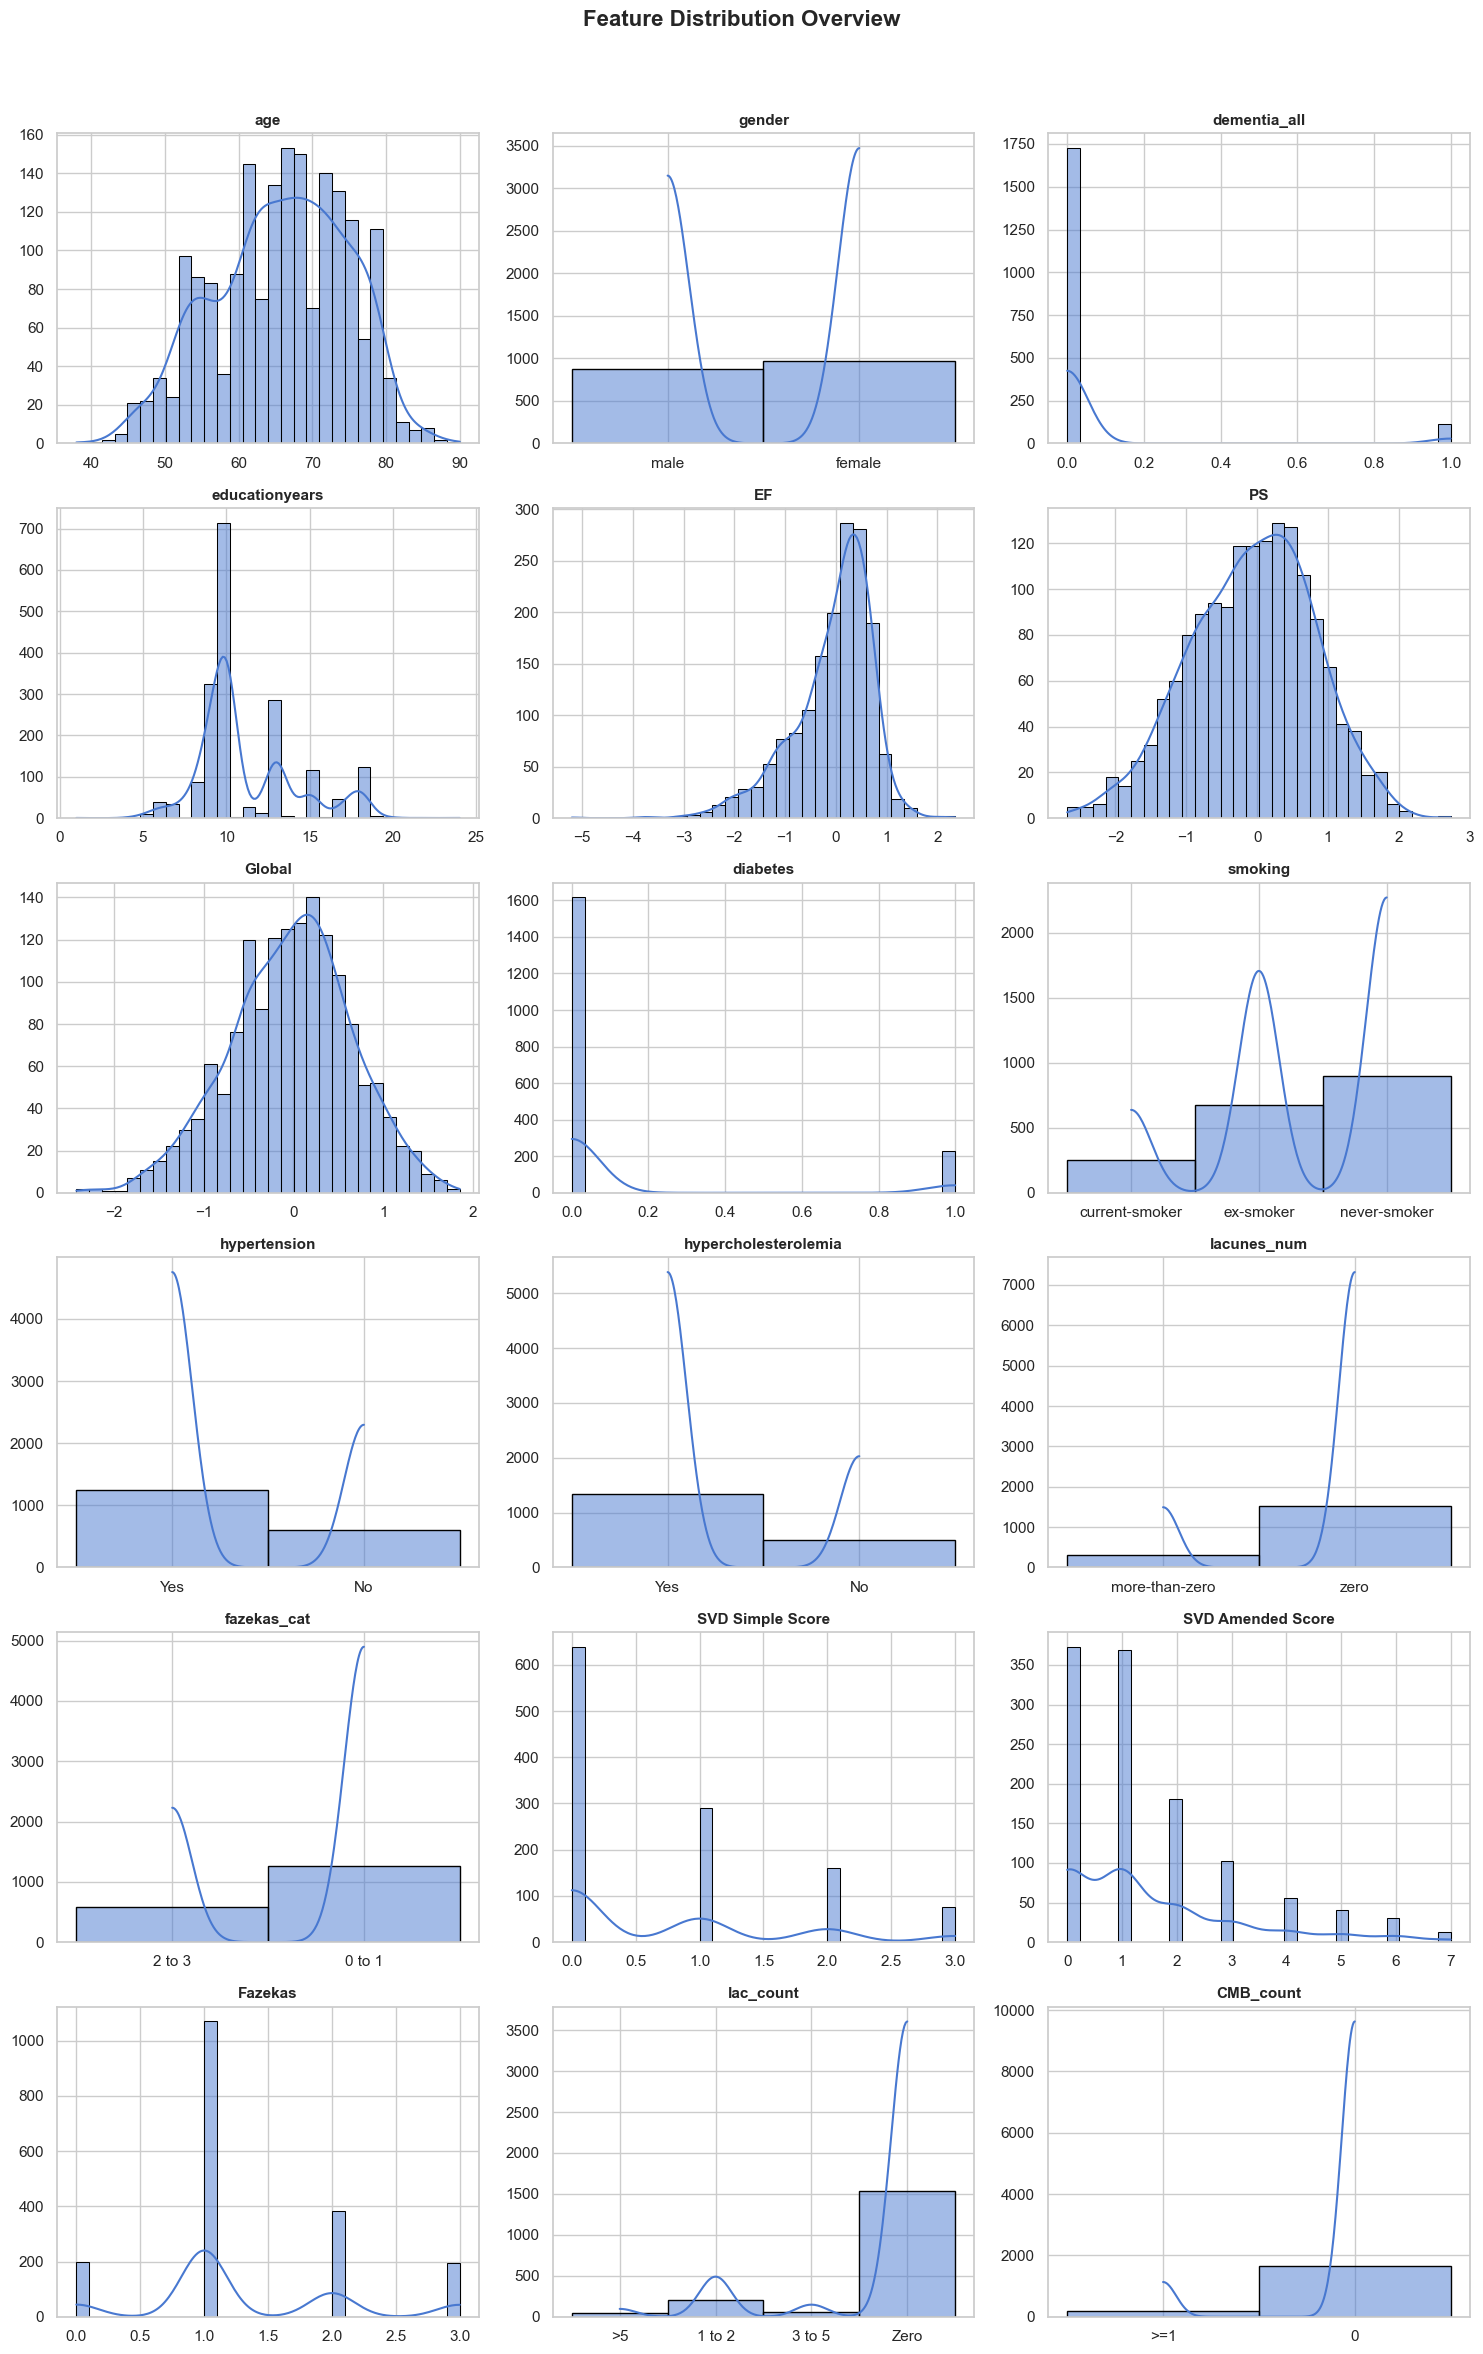

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set global style
sns.set_theme(style="whitegrid", palette="muted")

num_features = df.shape[1]
cols = 3                          # Number of columns in grid
rows = math.ceil(num_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(
        df[col],
        bins=30,
        kde=True,
        ax=axes[i],
        edgecolor="black"
    )
    axes[i].set_title(col, fontsize=11, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Feature Distribution Overview", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Null Value Analysis

In [12]:
df.isnull().sum()

age                       0
gender                    0
dementia_all              0
educationyears            0
EF                      208
PS                      268
Global                  308
diabetes                  0
smoking                  11
hypertension              0
hypercholesterolemia      0
lacunes_num               0
fazekas_cat               0
SVD Simple Score        677
SVD Amended Score       677
Fazekas                   0
lac_count                 0
CMB_count                 0
dtype: int64

### Percentage analysis of null values

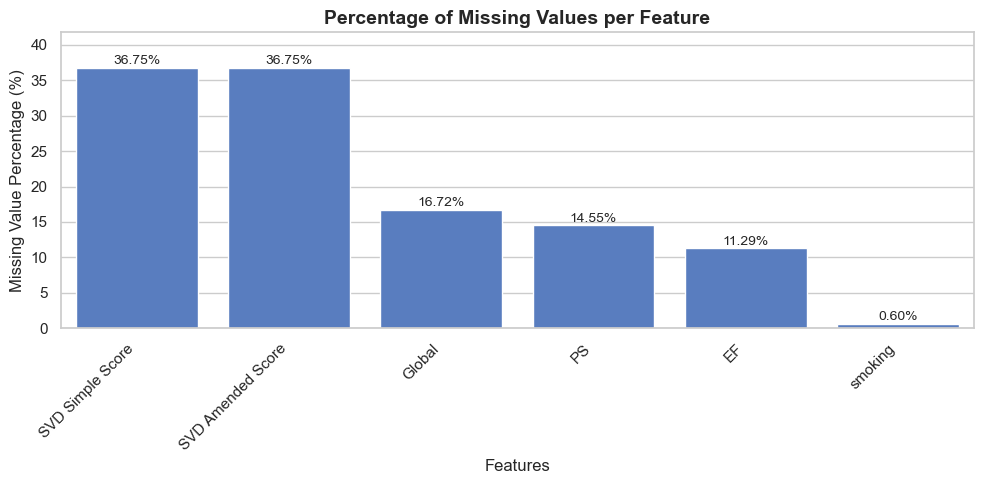

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate null percentages
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=null_percent.index,
    y=null_percent.values
)

# Annotate bars with percentage values
for i, val in enumerate(null_percent.values):
    plt.text(i, val + 0.5, f"{val:.2f}%", ha='center', fontsize=10)

plt.title("Percentage of Missing Values per Feature", fontsize=14, fontweight="bold")
plt.ylabel("Missing Value Percentage (%)")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, max(null_percent.values) + 5)
plt.tight_layout()
plt.show()


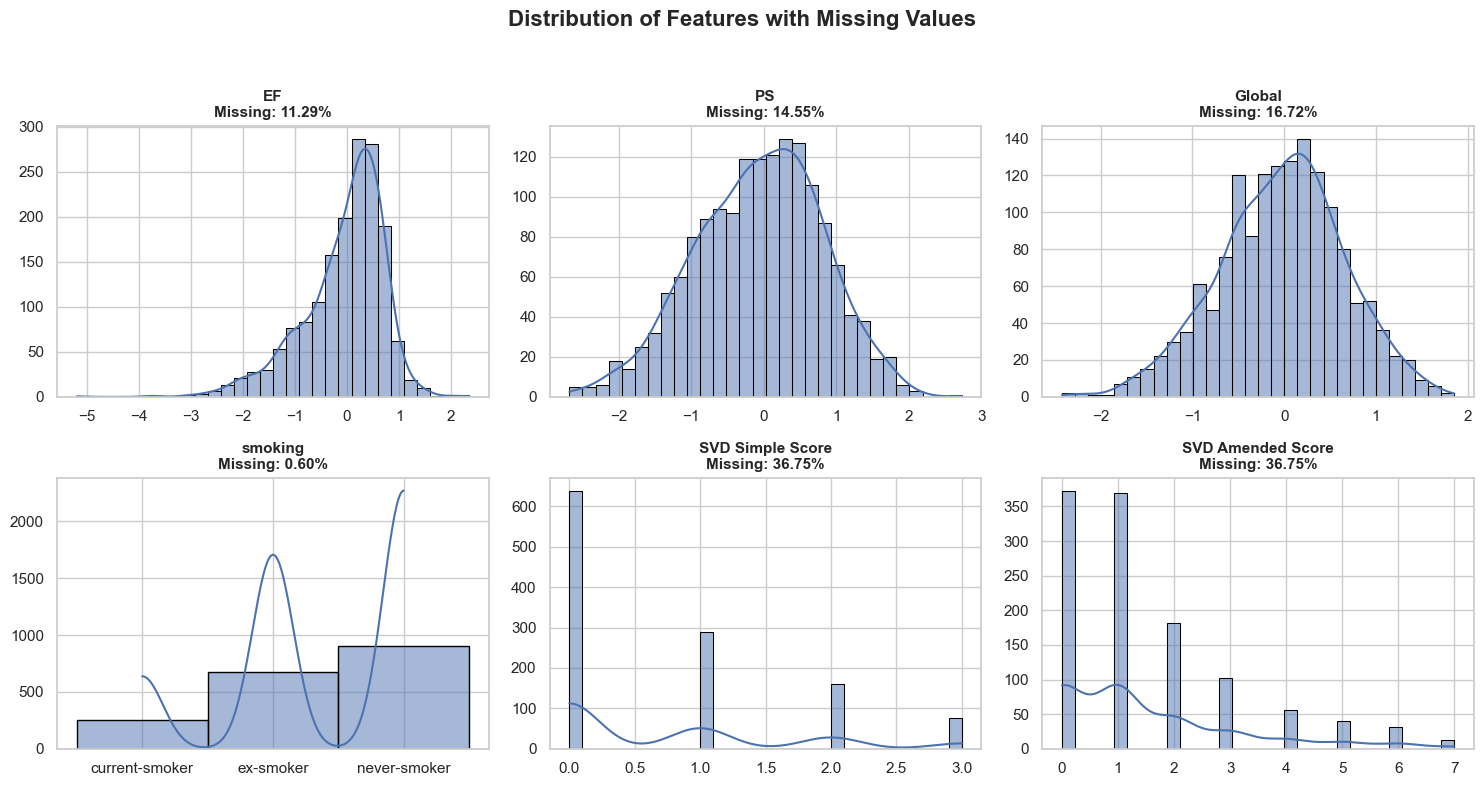

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Identify columns with null values
null_cols = df.columns[df.isnull().any()]

# If no nulls exist, avoid errors
if len(null_cols) == 0:
    print("No features with null values found.")
else:
    sns.set_theme(style="whitegrid")

    n = len(null_cols)
    cols = 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(null_cols):
        sns.histplot(
            df[col],
            bins=30,
            kde=True,
            ax=axes[i],
            edgecolor="black"
        )

        null_pct = df[col].isnull().mean() * 100
        axes[i].set_title(
            f"{col}\nMissing: {null_pct:.2f}%",
            fontsize=11,
            fontweight="bold"
        )
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(
        "Distribution of Features with Missing Values",
        fontsize=16,
        fontweight="bold"
    )
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [15]:
import pandas as pd

# 1. Select numeric columns that have null values
numeric_null_cols = (
    df.select_dtypes(include='number')
      .columns[df.select_dtypes(include='number').isnull().any()]
)

# 2. Compute skewness (NaNs automatically ignored)
skewness_df = pd.DataFrame({
    "Skewness": df[numeric_null_cols].skew(),
    "Null_Percentage (%)": df[numeric_null_cols].isnull().mean() * 100
}).sort_values("Skewness", ascending=False)

skewness_df


,Skewness,Null_Percentage (%)
SVD Amended Score,1.350950,36.753529
SVD Simple Score,1.069474,36.753529
PS,-0.201314,14.549403
Global,-0.201934,16.720955
EF,-1.137989,11.292074


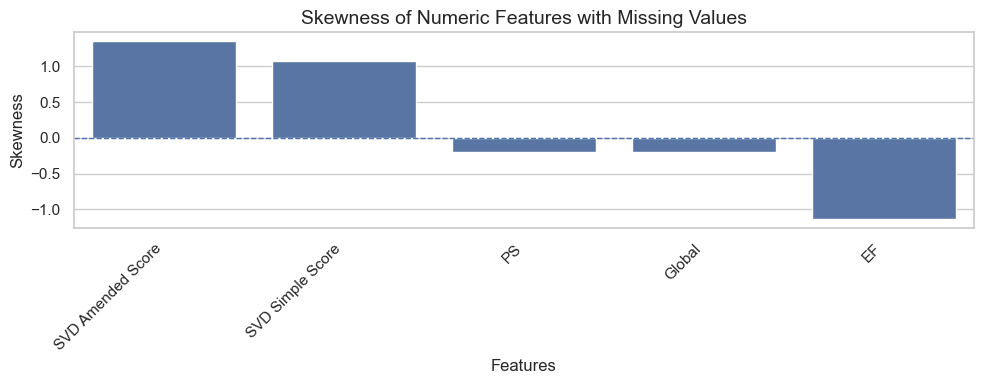

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.barplot(
    x=skewness_df.index,
    y=skewness_df["Skewness"]
)

plt.axhline(0, linestyle="--", linewidth=1)
plt.title("Skewness of Numeric Features with Missing Values", fontsize=14)
plt.ylabel("Skewness")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Handle Null Values based on distribution and skewness

In [17]:
## PS Feature Normally Distributed

### Imputation using Expectation-Maximization (EM) Algorithm

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Copy ps column
temp = df[['PS']].copy()

# Add a dummy column because IterativeImputer needs >1 feature
temp['dummy'] = 1

# EM-based imputer
imputer = IterativeImputer(max_iter=50, random_state=0)

# Fit and transform
imputed = imputer.fit_transform(temp)

# Take only the ps column after imputation
df['PS'] = imputed[:, 0]


In [18]:
## Global Feature Not Normally Distributed

### Imputation using Expectation-Maximization (EM) Algorithm

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

# Create temporary df with dummy column
temp = df[['Global']].copy()
temp['dummy'] = 1

# EM-based imputer
imputer = IterativeImputer(max_iter=50, random_state=0)

# Fit and transform
imputed = imputer.fit_transform(temp)

# Replace only Global column
df['Global'] = imputed[:, 0]


In [19]:
### EF is left skewed , hence median imputation used to handle null values

df['EF'].fillna(df['EF'].median(), inplace=True)

C:\Users\iyera\AppData\Local\Temp\ipykernel_10276\876997330.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EF'].fillna(df['EF'].median(), inplace=True)


In [20]:
## SVD Simple Score has high missing values , hence KNN imputation used to handle null values (also they are discrete values)

from sklearn.impute import KNNImputer
import numpy as np

imputer = KNNImputer(n_neighbors=5)

# use all numeric columns for better accuracy
numeric_cols = df.select_dtypes(include='number').columns

df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# round the svd simple score back to {0,1,2,3}
df['SVD Simple Score'] = df['SVD Simple Score'].round().clip(0, 3)


In [21]:
## SVD Amended Score has high missing values , hence KNN imputation used to handle null values (also they are discrete values)

from sklearn.impute import KNNImputer
import numpy as np

imputer = KNNImputer(n_neighbors=5)

# use all numeric columns for better accuracy
numeric_cols = df.select_dtypes(include='number').columns

df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# round the svd simple score back to {0,1,2,3}
df['SVD Amended Score'] = df['SVD Amended Score'].round().clip(0, 7)


In [22]:
df.isnull().sum()

age                      0
gender                   0
dementia_all             0
educationyears           0
EF                       0
PS                       0
Global                   0
diabetes                 0
smoking                 11
hypertension             0
hypercholesterolemia     0
lacunes_num              0
fazekas_cat              0
SVD Simple Score         0
SVD Amended Score        0
Fazekas                  0
lac_count                0
CMB_count                0
dtype: int64

In [23]:
### Smoking Column - Mode Imputation since categorical variable

mode_value = df['smoking'].mode()[0]
df['smoking'].fillna(mode_value, inplace=True)


C:\Users\iyera\AppData\Local\Temp\ipykernel_10276\2152713988.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoking'].fillna(mode_value, inplace=True)


In [24]:
df.isnull().sum()

age                     0
gender                  0
dementia_all            0
educationyears          0
EF                      0
PS                      0
Global                  0
diabetes                0
smoking                 0
hypertension            0
hypercholesterolemia    0
lacunes_num             0
fazekas_cat             0
SVD Simple Score        0
SVD Amended Score       0
Fazekas                 0
lac_count               0
CMB_count               0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1842 non-null   float64
 1   gender                1842 non-null   object 
 2   dementia_all          1842 non-null   float64
 3   educationyears        1842 non-null   float64
 4   EF                    1842 non-null   float64
 5   PS                    1842 non-null   float64
 6   Global                1842 non-null   float64
 7   diabetes              1842 non-null   float64
 8   smoking               1842 non-null   object 
 9   hypertension          1842 non-null   object 
 10  hypercholesterolemia  1842 non-null   object 
 11  lacunes_num           1842 non-null   object 
 12  fazekas_cat           1842 non-null   object 
 13  SVD Simple Score      1842 non-null   float64
 14  SVD Amended Score     1842 non-null   float64
 15  Fazekas              

### Encoding using Label Encoder

In [26]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store mappings
label_mappings = {}

# Loop through categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])   # update directly in df

    # Store mapping (class → code)
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print mappings
for col, mapping in label_mappings.items():
    print(f"\nColumn: {col}")
    for k, v in mapping.items():
        print(f"  {k} -> {v}")



Column: gender
  female -> 0
  male -> 1

Column: smoking
  current-smoker -> 0
  ex-smoker -> 1
  never-smoker -> 2

Column: hypertension
  No -> 0
  Yes -> 1

Column: hypercholesterolemia
  No -> 0
  Yes -> 1

Column: lacunes_num
  more-than-zero -> 0
  zero -> 1

Column: fazekas_cat
  0 to 1 -> 0
  2 to 3 -> 1

Column: lac_count
  1 to 2 -> 0
  3 to 5 -> 1
  >5 -> 2
  Zero -> 3

Column: CMB_count
  0 -> 0
  >=1 -> 1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1842 non-null   float64
 1   gender                1842 non-null   int32  
 2   dementia_all          1842 non-null   float64
 3   educationyears        1842 non-null   float64
 4   EF                    1842 non-null   float64
 5   PS                    1842 non-null   float64
 6   Global                1842 non-null   float64
 7   diabetes              1842 non-null   float64
 8   smoking               1842 non-null   int32  
 9   hypertension          1842 non-null   int32  
 10  hypercholesterolemia  1842 non-null   int32  
 11  lacunes_num           1842 non-null   int32  
 12  fazekas_cat           1842 non-null   int32  
 13  SVD Simple Score      1842 non-null   float64
 14  SVD Amended Score     1842 non-null   float64
 15  Fazekas              

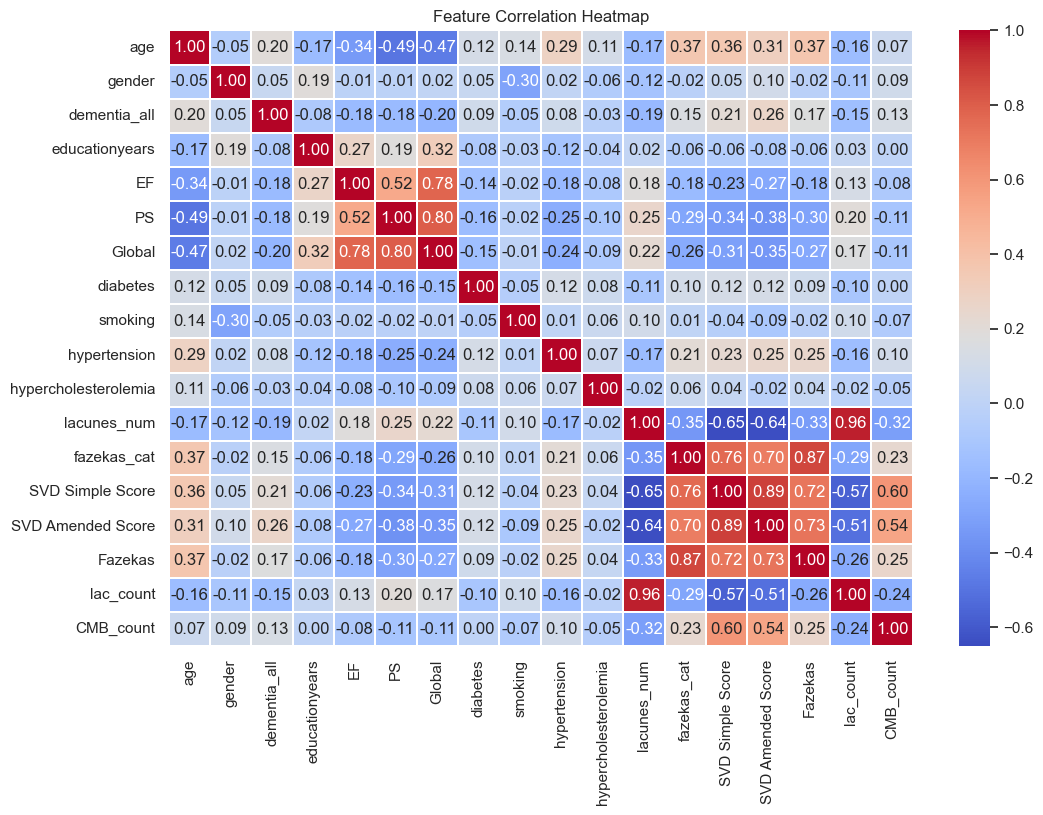

In [28]:
# plotting heatmap

corr_matrix =df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.2)
plt.title("Feature Correlation Heatmap")
plt.show()


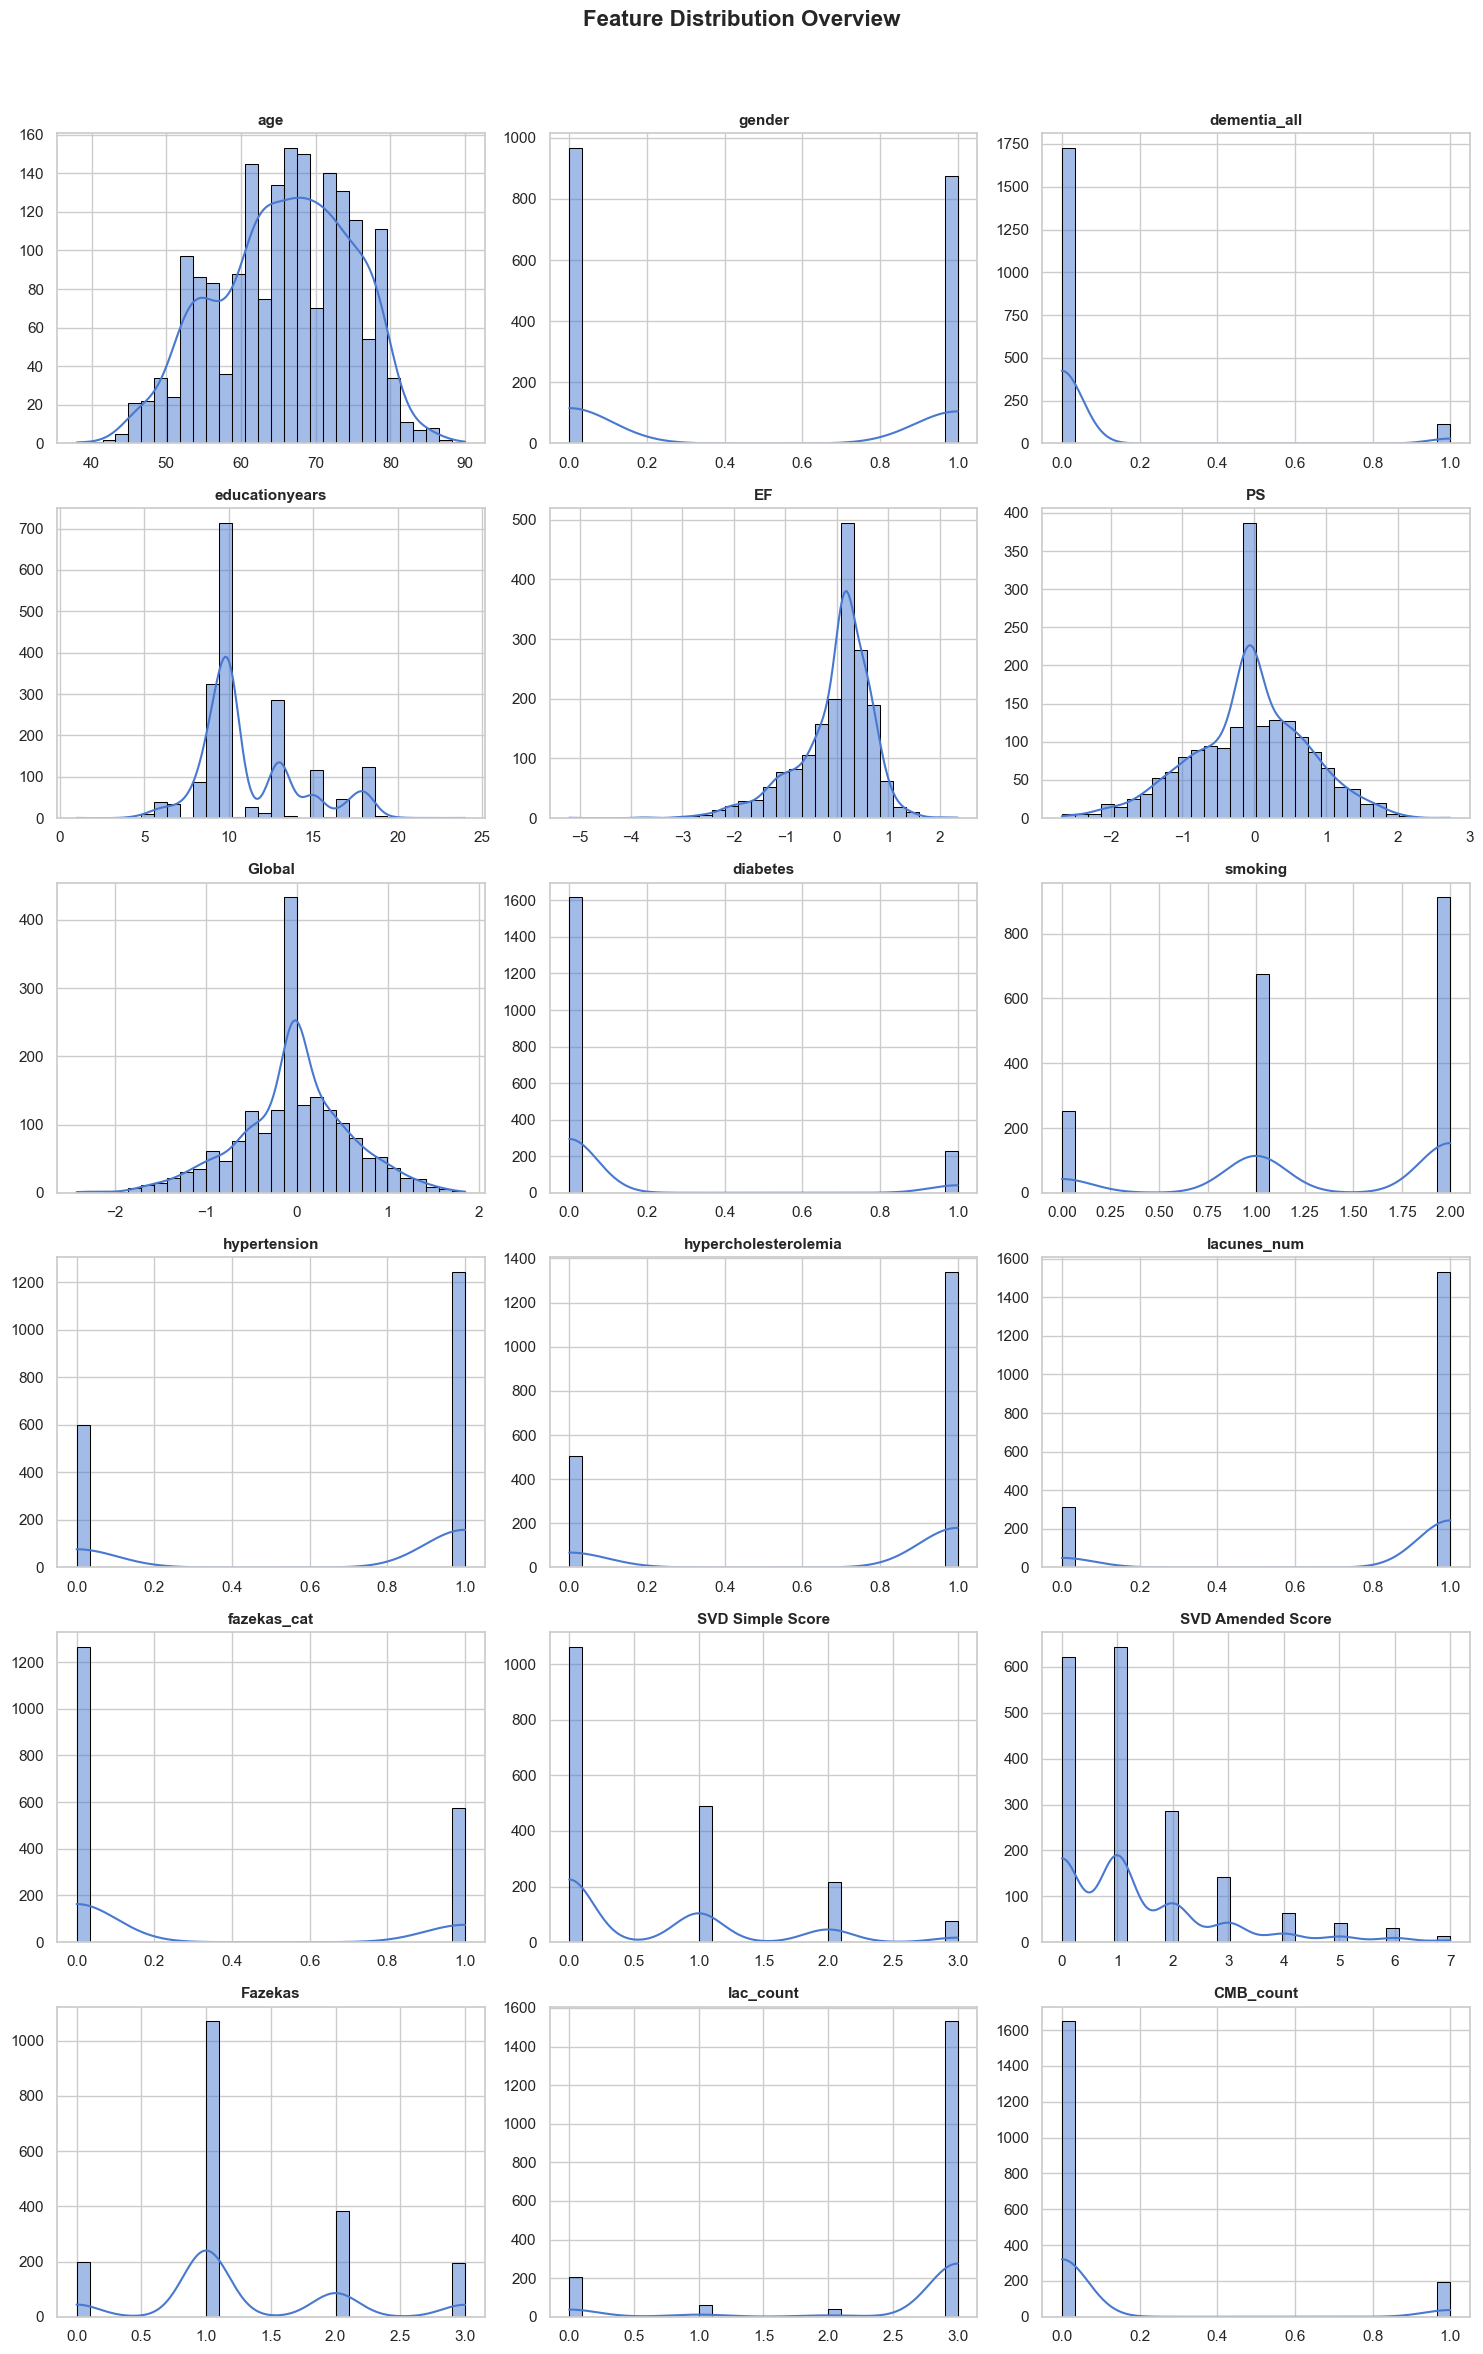

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set global style
sns.set_theme(style="whitegrid", palette="muted")

num_features = df.shape[1]
cols = 3                          # Number of columns in grid
rows = math.ceil(num_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(
        df[col],
        bins=30,
        kde=True,
        ax=axes[i],
        edgecolor="black"
    )
    axes[i].set_title(col, fontsize=11, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Feature Distribution Overview", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


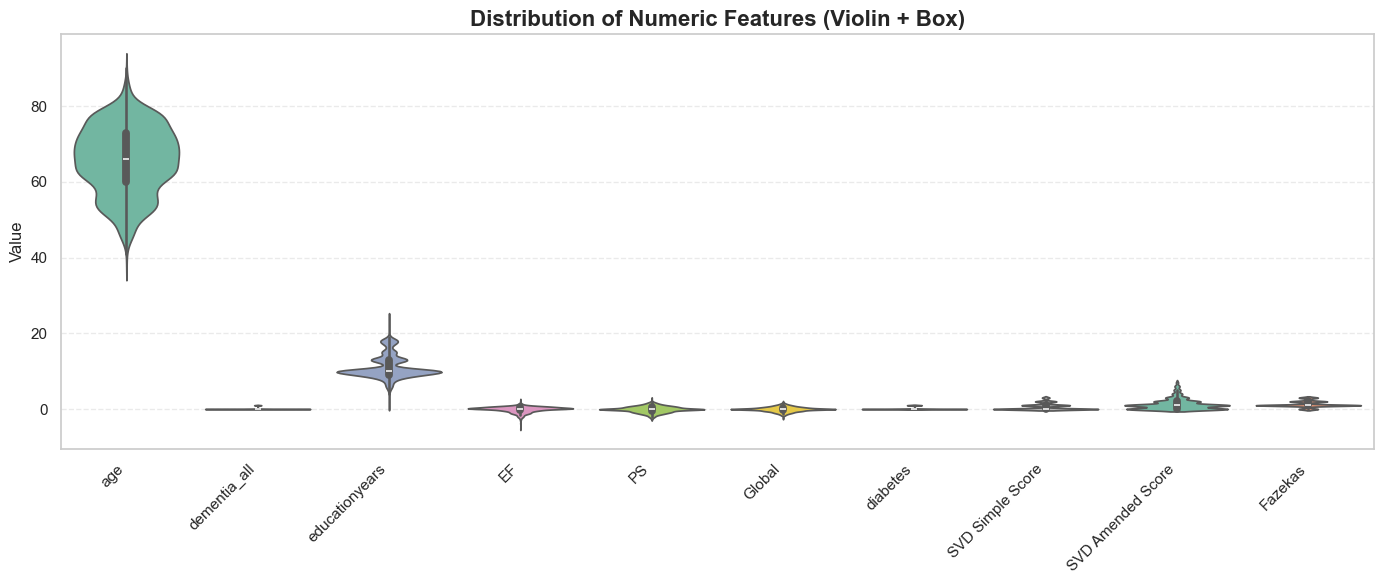

In [30]:
plt.figure(figsize=(14, 6))

sns.violinplot(
    data=df[numeric_cols],
    inner="box",
    palette="Set2"
)

plt.xticks(rotation=45, ha="right")
plt.title(
    "Distribution of Numeric Features (Violin + Box)",
    fontsize=16,
    fontweight="bold"
)
plt.ylabel("Value")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


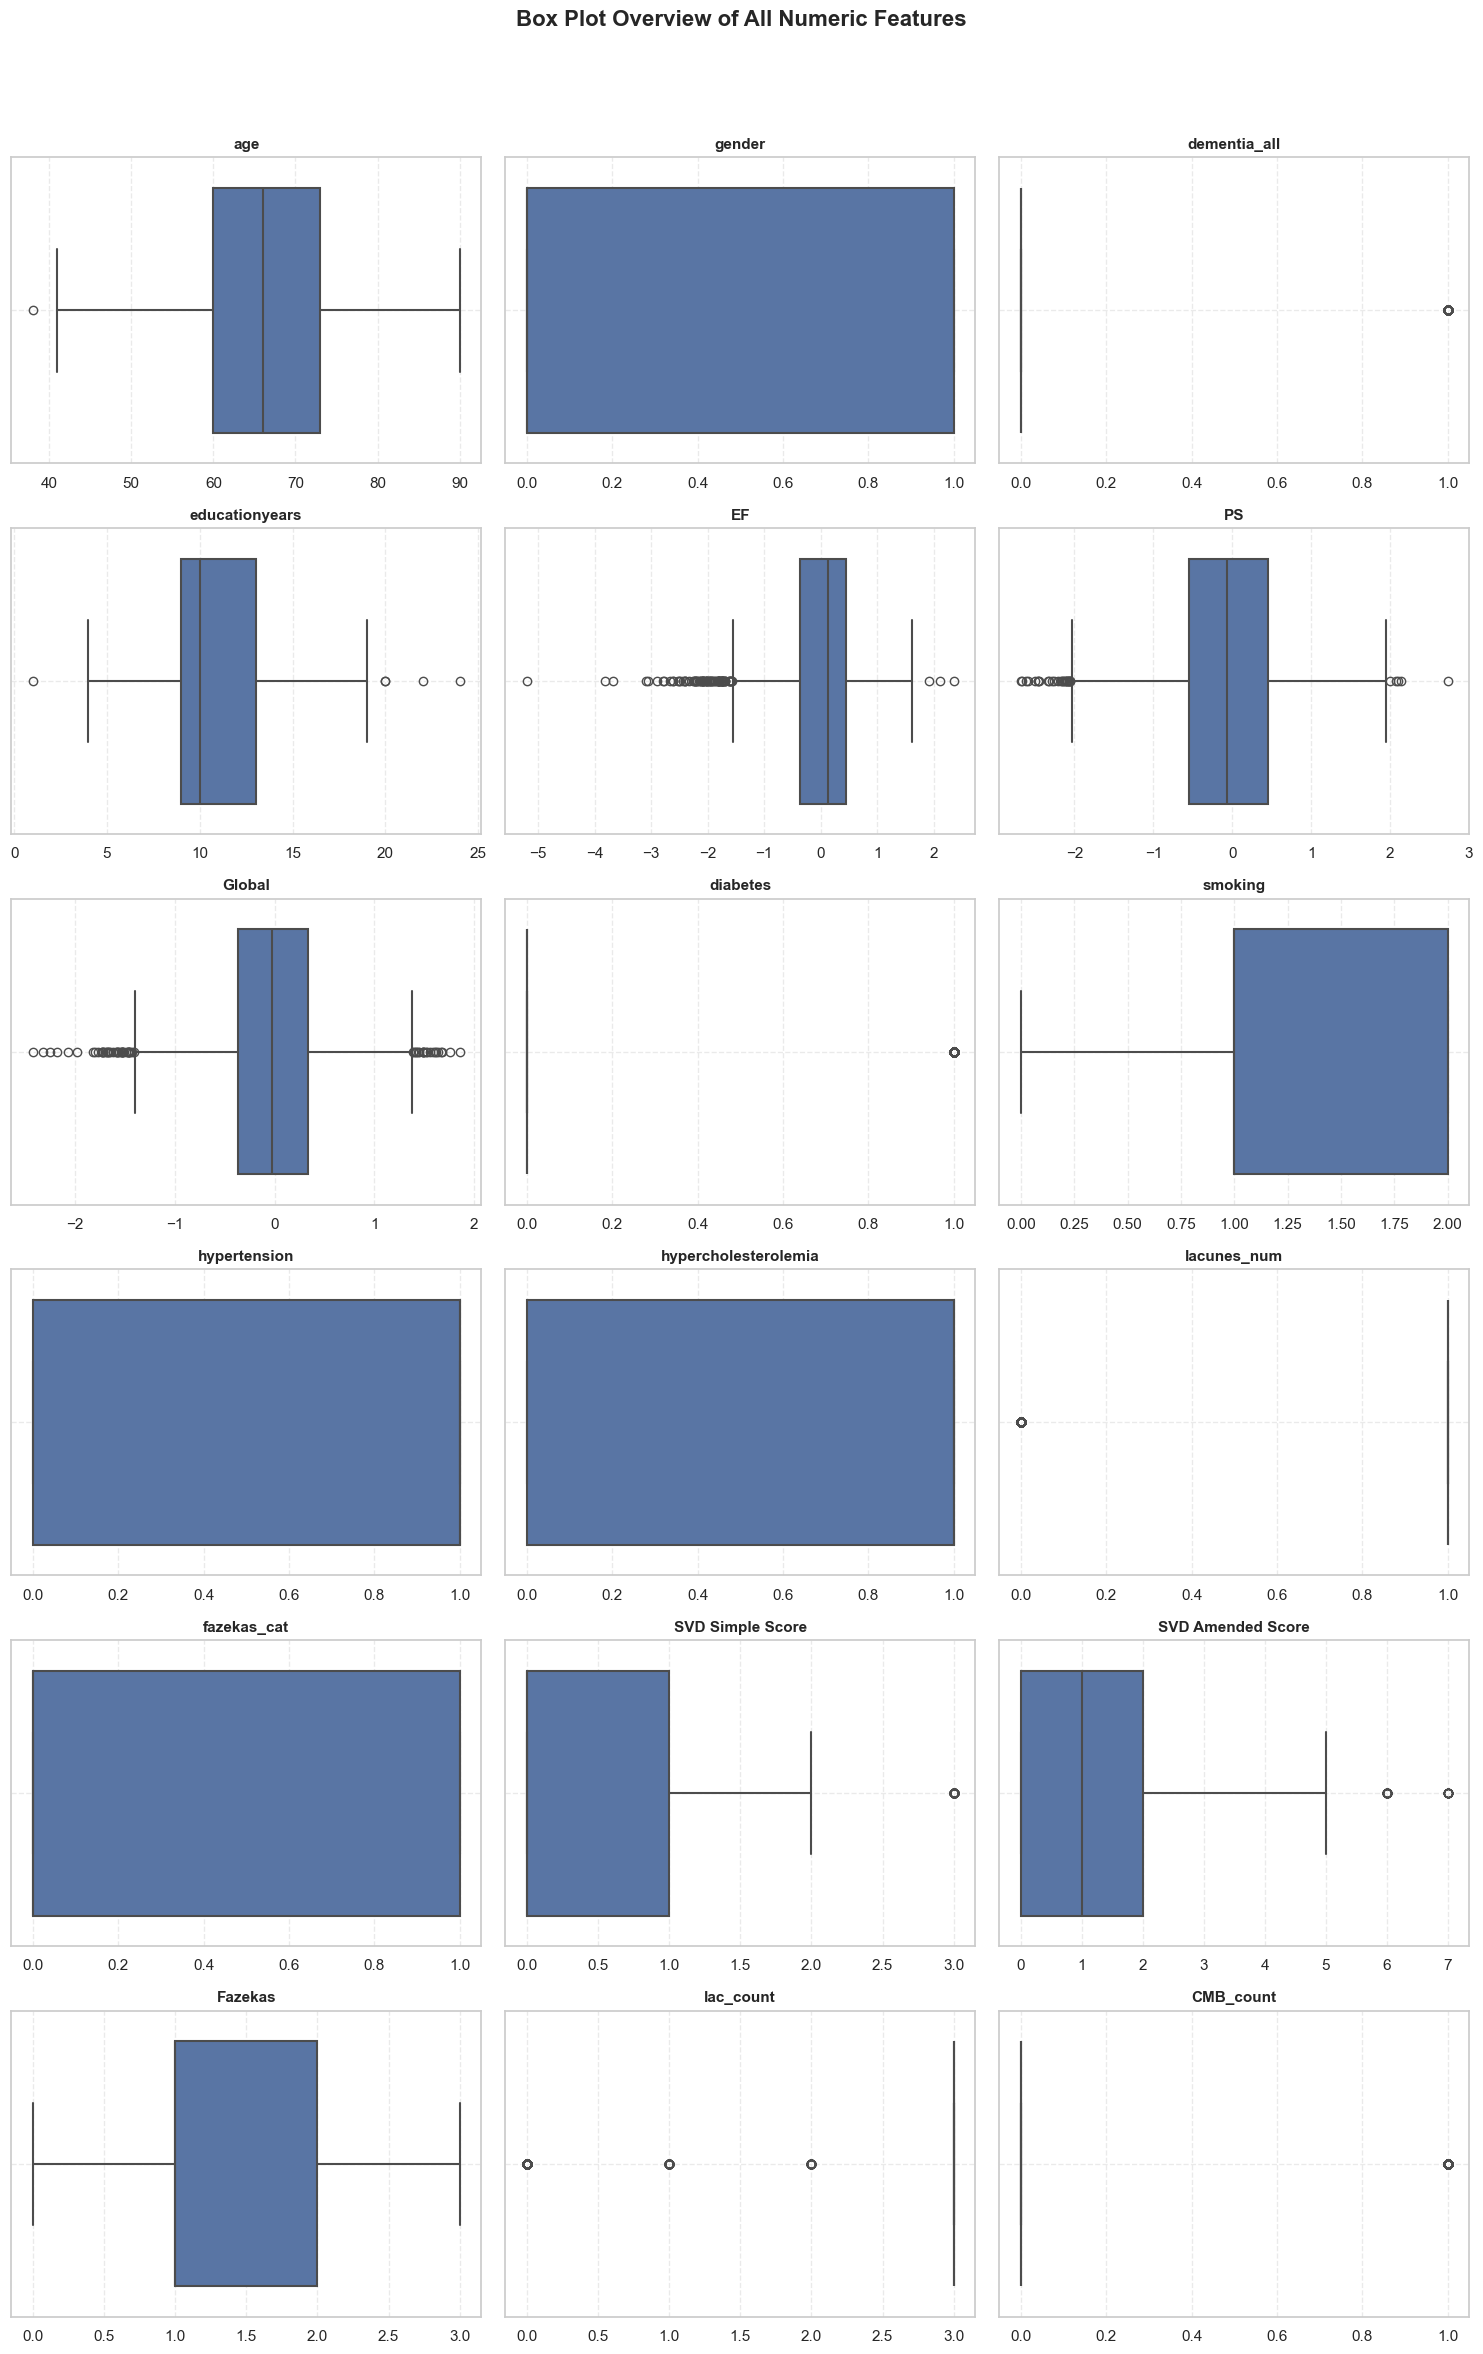

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

sns.set_theme(style="whitegrid")

n = len(numeric_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(
        x=df[col],
        ax=axes[i],
        color="#4C72B0",
        linewidth=1.5
    )
    axes[i].set_title(col, fontsize=11, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].grid(True, linestyle="--", alpha=0.4)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(
    "Box Plot Overview of All Numeric Features",
    fontsize=16,
    fontweight="bold"
)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


C:\Users\iyera\AppData\Local\Temp\ipykernel_10276\3464114737.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


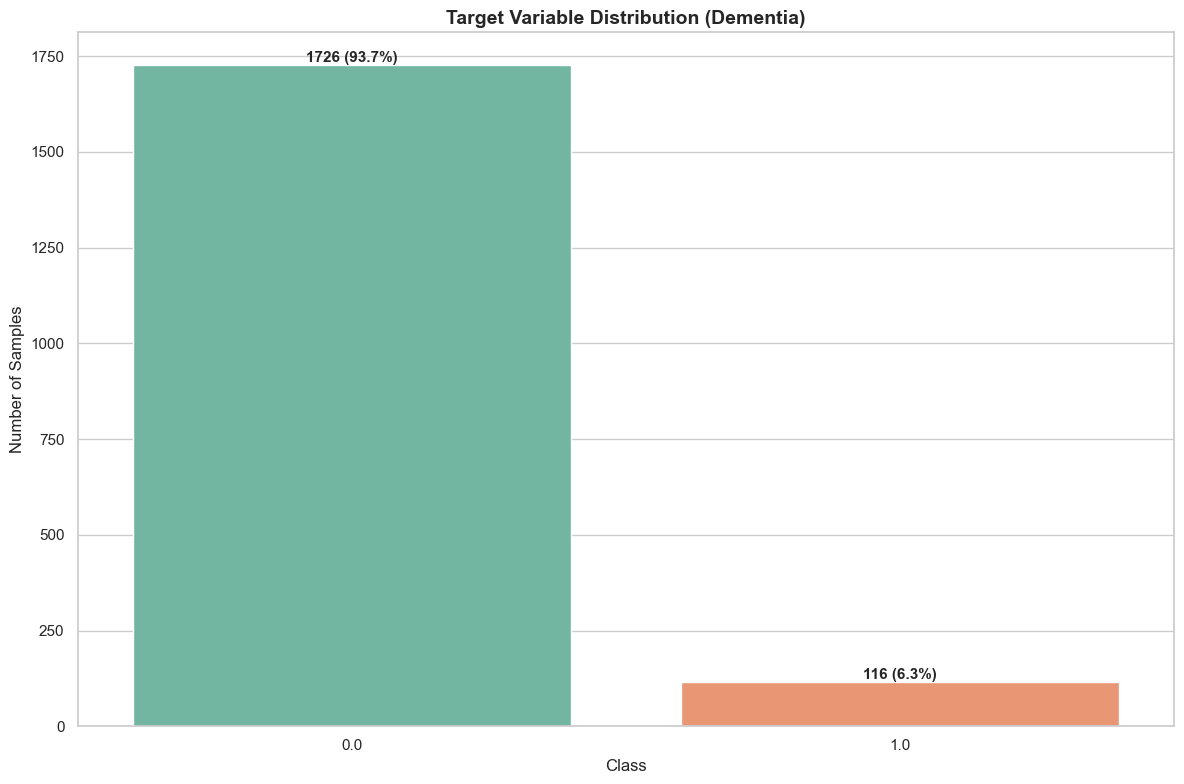

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentages
target_counts = df['dementia_all'].value_counts()
target_percent = df['dementia_all'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=target_counts.index,
    y=target_counts.values,
    palette="Set2"
)

# Annotate counts + percentages
for i, label in enumerate(target_counts.index):
    ax.text(
        i,
        target_counts.values[i],
        f"{target_counts.values[i]} ({target_percent[label]:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold"
    )

plt.title("Target Variable Distribution (Dementia)", fontsize=14, fontweight="bold")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()


### Training NN Baseline Model Without balancing

In [33]:
X=df.drop(columns=['dementia_all'])
y=df['dementia_all']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim

In [37]:
## These lines convert training and test data from NumPy/Pandas format into properly shaped PyTorch tensors required for neural network training and evaluation.

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values if hasattr(y_train, "values") else y_train,
                          dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values if hasattr(y_test, "values") else y_test,
                         dtype=torch.float32).view(-1, 1)


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim

class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        
        # Defining the layers
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.network(x)

# 1. Initialize the model
input_shape = X_train.shape[1]
model = BinaryClassifier(input_dim=input_shape)

# 2. Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 3. Define Optimizer (Adam) and Loss (Binary Cross Entropy)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.BCELoss()

print(model)

BinaryClassifier(
  (network): Sequential(
    (0): Linear(in_features=17, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=64, out_features=32, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=32, out_features=1, bias=True)
    (13): Sigmoid()
  )
)


In [39]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.


In [40]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# -------------------------------------------------
# DataLoaders
# -------------------------------------------------
train_loader = DataLoader(
    TensorDataset(X_train_t, y_train_t),
    batch_size=32,
    shuffle=True
)

val_loader = DataLoader(
    TensorDataset(X_test_t, y_test_t),
    batch_size=32
)

# -------------------------------------------------
# Training Settings
# -------------------------------------------------
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# -------------------------------------------------
# History Storage
# -------------------------------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []

# -------------------------------------------------
# Training Loop (Epoch-wise Output)
# -------------------------------------------------
for epoch in range(epochs):

    # ===== TRAINING =====
    model.train()
    train_loss, train_correct = 0.0, 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).view(-1, 1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        train_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_correct / len(train_loader.dataset)

    # ===== VALIDATION =====
    model.eval()
    val_loss, val_correct = 0.0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device).view(-1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader.dataset)
    avg_val_acc = val_correct / len(val_loader.dataset)

    # ===== STORE HISTORY =====
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accs.append(avg_train_acc)
    val_accs.append(avg_val_acc)

    # ===== KERAS-STYLE EPOCH PRINT =====
    print(
        f"Epoch {epoch+1}/{epochs} - "
        f"loss: {avg_train_loss:.4f} - "
        f"acc: {avg_train_acc:.4f} - "
        f"val_loss: {avg_val_loss:.4f} - "
        f"val_acc: {avg_val_acc:.4f}"
    )


Epoch 1/100 - loss: 0.6558 - acc: 0.8703 - val_loss: 0.6078 - val_acc: 0.9322
Epoch 2/100 - loss: 0.5301 - acc: 0.9375 - val_loss: 0.4229 - val_acc: 0.9322
Epoch 3/100 - loss: 0.3324 - acc: 0.9382 - val_loss: 0.2643 - val_acc: 0.9322
Epoch 4/100 - loss: 0.2510 - acc: 0.9382 - val_loss: 0.2357 - val_acc: 0.9322
Epoch 5/100 - loss: 0.2315 - acc: 0.9382 - val_loss: 0.2250 - val_acc: 0.9322
Epoch 6/100 - loss: 0.2199 - acc: 0.9382 - val_loss: 0.2195 - val_acc: 0.9322
Epoch 7/100 - loss: 0.2134 - acc: 0.9382 - val_loss: 0.2161 - val_acc: 0.9322
Epoch 8/100 - loss: 0.2078 - acc: 0.9382 - val_loss: 0.2158 - val_acc: 0.9322
Epoch 9/100 - loss: 0.2104 - acc: 0.9382 - val_loss: 0.2131 - val_acc: 0.9322
Epoch 10/100 - loss: 0.2056 - acc: 0.9382 - val_loss: 0.2144 - val_acc: 0.9322
Epoch 11/100 - loss: 0.2051 - acc: 0.9382 - val_loss: 0.2135 - val_acc: 0.9322
Epoch 12/100 - loss: 0.2024 - acc: 0.9382 - val_loss: 0.2133 - val_acc: 0.9322
Epoch 13/100 - loss: 0.2018 - acc: 0.9382 - val_loss: 0.2134 

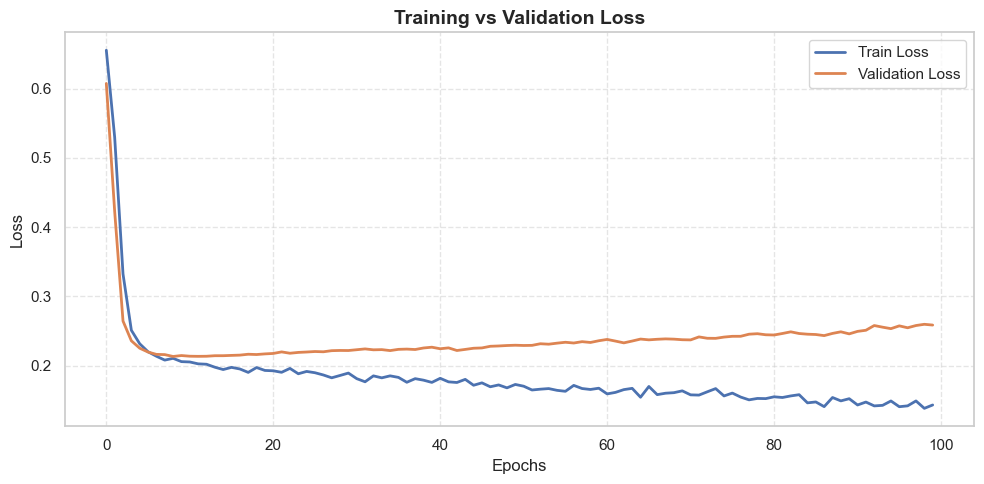

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", linewidth=2)
plt.plot(val_losses, label="Validation Loss", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


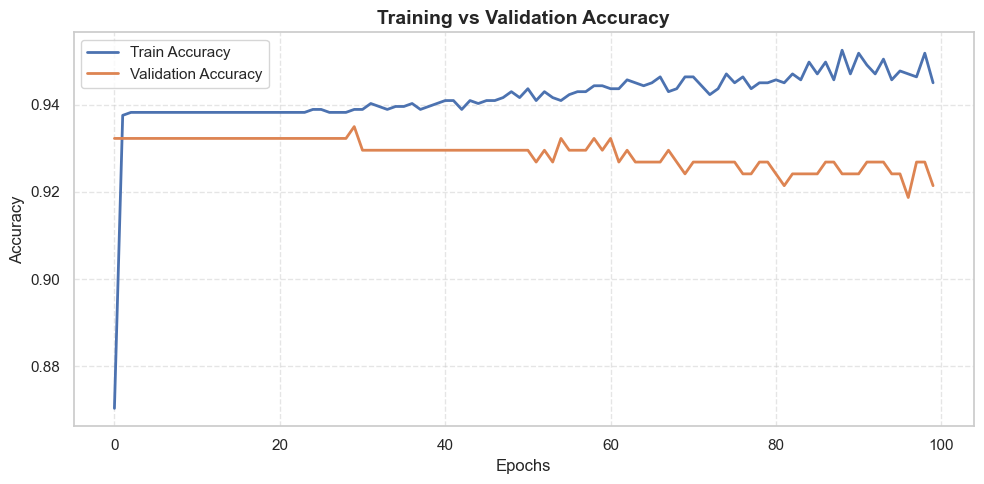

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label="Train Accuracy", linewidth=2)
plt.plot(val_accs, label="Validation Accuracy", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


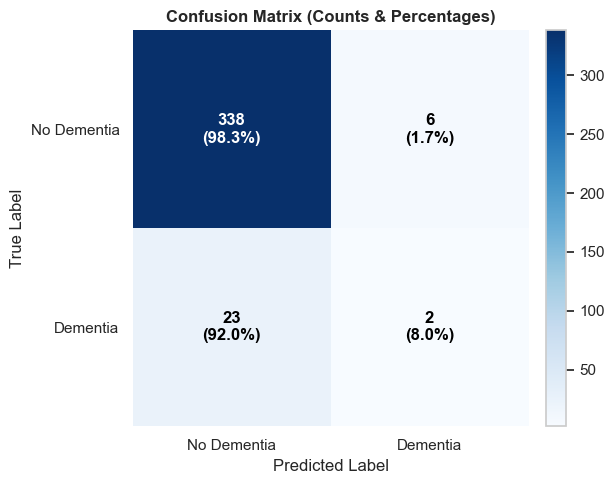

In [43]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        preds = (outputs > 0.5).int()

        y_pred.extend(preds.cpu().numpy().flatten())
        y_true.extend(labels.cpu().numpy().flatten())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert to percentages
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")
plt.colorbar(fraction=0.046, pad=0.04)

plt.xticks([0, 1], ["No Dementia", "Dementia"])
plt.yticks([0, 1], ["No Dementia", "Dementia"])

# Remove grid and spines (THIS removes the boxes)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Annotate
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i,
            f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)",
            ha="center",
            va="center",
            fontsize=12,
            fontweight="bold",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Counts & Percentages)", fontweight="bold")
plt.tight_layout()
plt.show()

In [44]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, cohen_kappa_score
)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)

print("📊 Evaluation Metrics")
print(f"Accuracy        : {accuracy:.4f}")
print(f"Precision       : {precision:.4f}")
print(f"Recall          : {recall:.4f}")
print(f"F1 Score        : {f1:.4f}")
print(f"Cohen’s Kappa   : {kappa:.4f}")


📊 Evaluation Metrics
Accuracy        : 0.9214
Precision       : 0.2500
Recall          : 0.0800
F1 Score        : 0.1212
Cohen’s Kappa   : 0.0914


### Altering Learning Rate

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim

class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        
        # Defining the layers
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.4),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.4),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.4),
            
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.network(x)

# 1. Initialize the model
input_shape = X_train.shape[1]
model = BinaryClassifier(input_dim=input_shape)

# 2. Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 3. Define Optimizer (Adam) and Loss (Binary Cross Entropy)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

print(model)

BinaryClassifier(
  (network): Sequential(
    (0): Linear(in_features=17, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=64, out_features=32, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=32, out_features=1, bias=True)
    (13): Sigmoid()
  )
)


In [46]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# -------------------------------------------------
# DataLoaders
# -------------------------------------------------
train_loader = DataLoader(
    TensorDataset(X_train_t, y_train_t),
    batch_size=32,
    shuffle=True
)

val_loader = DataLoader(
    TensorDataset(X_test_t, y_test_t),
    batch_size=32
)

# -------------------------------------------------
# Training Settings
# -------------------------------------------------
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# -------------------------------------------------
# History Storage
# -------------------------------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []

# -------------------------------------------------
# Training Loop (Epoch-wise Output)
# -------------------------------------------------
for epoch in range(epochs):

    # ===== TRAINING =====
    model.train()
    train_loss, train_correct = 0.0, 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).view(-1, 1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        train_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_correct / len(train_loader.dataset)

    # ===== VALIDATION =====
    model.eval()
    val_loss, val_correct = 0.0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device).view(-1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader.dataset)
    avg_val_acc = val_correct / len(val_loader.dataset)

    # ===== STORE HISTORY =====
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accs.append(avg_train_acc)
    val_accs.append(avg_val_acc)

    # ===== KERAS-STYLE EPOCH PRINT =====
    print(
        f"Epoch {epoch+1}/{epochs} - "
        f"loss: {avg_train_loss:.4f} - "
        f"acc: {avg_train_acc:.4f} - "
        f"val_loss: {avg_val_loss:.4f} - "
        f"val_acc: {avg_val_acc:.4f}"
    )


Epoch 1/100 - loss: 0.3728 - acc: 0.8778 - val_loss: 0.2161 - val_acc: 0.9322
Epoch 2/100 - loss: 0.2334 - acc: 0.9382 - val_loss: 0.2114 - val_acc: 0.9322
Epoch 3/100 - loss: 0.2098 - acc: 0.9382 - val_loss: 0.2171 - val_acc: 0.9322
Epoch 4/100 - loss: 0.2066 - acc: 0.9382 - val_loss: 0.2176 - val_acc: 0.9322
Epoch 5/100 - loss: 0.2053 - acc: 0.9382 - val_loss: 0.2173 - val_acc: 0.9322
Epoch 6/100 - loss: 0.1932 - acc: 0.9382 - val_loss: 0.2234 - val_acc: 0.9322
Epoch 7/100 - loss: 0.1938 - acc: 0.9382 - val_loss: 0.2369 - val_acc: 0.9322
Epoch 8/100 - loss: 0.1935 - acc: 0.9382 - val_loss: 0.2309 - val_acc: 0.9350
Epoch 9/100 - loss: 0.1846 - acc: 0.9396 - val_loss: 0.2434 - val_acc: 0.9377
Epoch 10/100 - loss: 0.1807 - acc: 0.9375 - val_loss: 0.2345 - val_acc: 0.9322
Epoch 11/100 - loss: 0.1789 - acc: 0.9437 - val_loss: 0.2274 - val_acc: 0.9322
Epoch 12/100 - loss: 0.1734 - acc: 0.9382 - val_loss: 0.2327 - val_acc: 0.9268
Epoch 13/100 - loss: 0.1857 - acc: 0.9409 - val_loss: 0.2372 

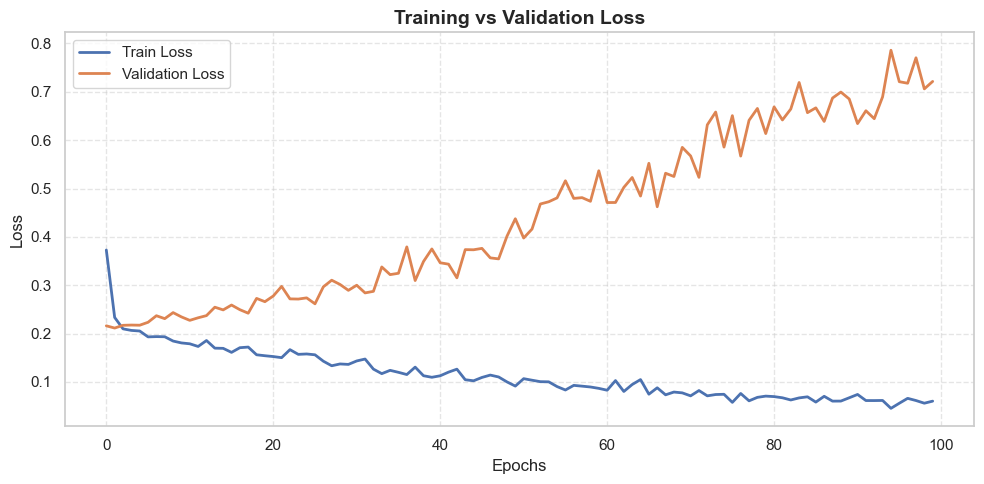

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", linewidth=2)
plt.plot(val_losses, label="Validation Loss", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


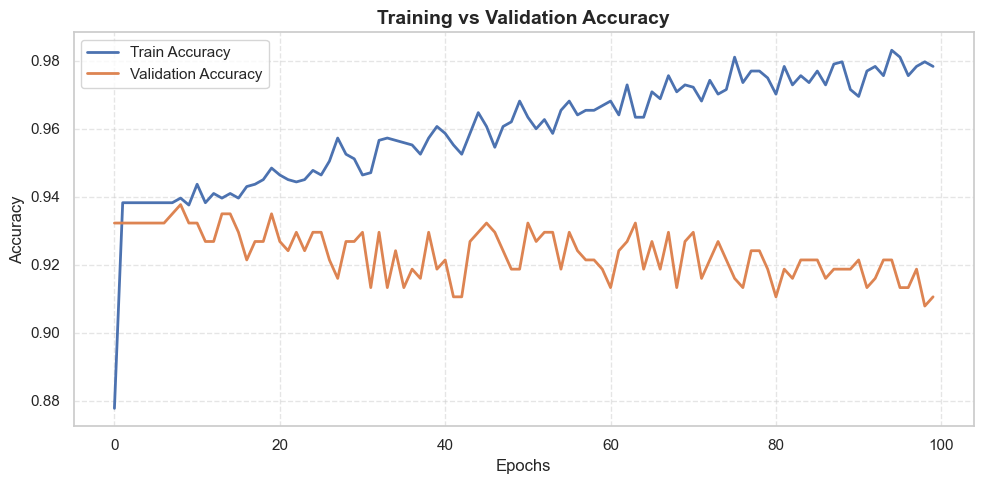

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label="Train Accuracy", linewidth=2)
plt.plot(val_accs, label="Validation Accuracy", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


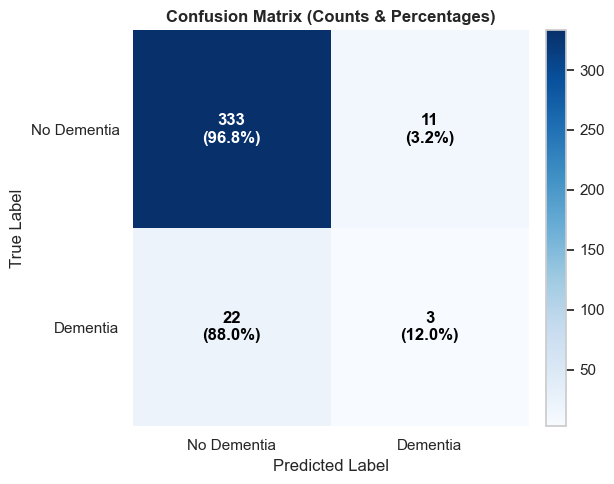

In [49]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        preds = (outputs > 0.5).int()

        y_pred.extend(preds.cpu().numpy().flatten())
        y_true.extend(labels.cpu().numpy().flatten())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert to percentages
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")
plt.colorbar(fraction=0.046, pad=0.04)

plt.xticks([0, 1], ["No Dementia", "Dementia"])
plt.yticks([0, 1], ["No Dementia", "Dementia"])

# Remove grid and spines (THIS removes the boxes)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Annotate
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i,
            f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)",
            ha="center",
            va="center",
            fontsize=12,
            fontweight="bold",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Counts & Percentages)", fontweight="bold")
plt.tight_layout()
plt.show()

In [50]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, cohen_kappa_score
)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)

print("📊 Evaluation Metrics")
print(f"Accuracy        : {accuracy:.4f}")
print(f"Precision       : {precision:.4f}")
print(f"Recall          : {recall:.4f}")
print(f"F1 Score        : {f1:.4f}")
print(f"Cohen’s Kappa   : {kappa:.4f}")


📊 Evaluation Metrics
Accuracy        : 0.9106
Precision       : 0.2143
Recall          : 0.1200
F1 Score        : 0.1538
Cohen’s Kappa   : 0.1106


### Applying SMOTE ENN + SMOTE

In [52]:
from imblearn.combine import SMOTEENN

In [53]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
import pandas as pd

# ------------------------------
# 1️⃣ Separate features & target
# ------------------------------
X = df.drop(columns=['dementia_all'])
y = df['dementia_all']

print("Before Resampling:", X.shape, y.value_counts().to_dict())

# ------------------------------
# 2️⃣ Apply SMOTE-ENN
# ------------------------------
smote_enn = SMOTEENN(random_state=42)
X_enn, y_enn = smote_enn.fit_resample(X, y)

print("After SMOTE-ENN:", X_enn.shape, pd.Series(y_enn).value_counts().to_dict())

# ------------------------------
# 3️⃣ Apply SMOTE
# ------------------------------
smote = SMOTE(random_state=42)
X_final, y_final = smote.fit_resample(X_enn, y_enn)

print("After SMOTE:", X_final.shape, pd.Series(y_final).value_counts().to_dict())

# ------------------------------
# 4️⃣ Final DataFrame (Saved as df_final)
# ------------------------------
df_final = pd.DataFrame(X_final, columns=X.columns)
df_final['dementia_all'] = y_final

print("Final Balanced DF Shape:", df_final.shape)
df_final.head()


Before Resampling: (1842, 17) {0.0: 1726, 1.0: 116}
After SMOTE-ENN: (2922, 17) {1.0: 1687, 0.0: 1235}
After SMOTE: (3374, 17) {0.0: 1687, 1.0: 1687}
Final Balanced DF Shape: (3374, 18)


,age,gender,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count,dementia_all
0,64.0,1,10.0,1.28,0.360000,0.744000,0.0,1,1,1,0,0,2.0,3.0,1.0,0,1,0.0
1,74.0,1,8.0,-1.44,-1.520000,-0.922000,0.0,2,1,1,0,0,1.0,2.0,1.0,0,0,0.0
2,62.0,1,24.0,-0.38,-1.110000,-0.526667,0.0,1,1,1,1,1,0.0,2.0,2.0,3,0,0.0
3,76.0,1,19.0,0.61,-0.403333,0.120000,0.0,2,1,1,1,1,2.0,3.0,2.0,3,1,0.0
4,69.0,0,12.0,0.73,0.793333,0.672000,0.0,2,1,1,0,1,2.0,3.0,2.0,0,0,0.0


C:\Users\iyera\AppData\Local\Temp\ipykernel_10276\1022853865.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


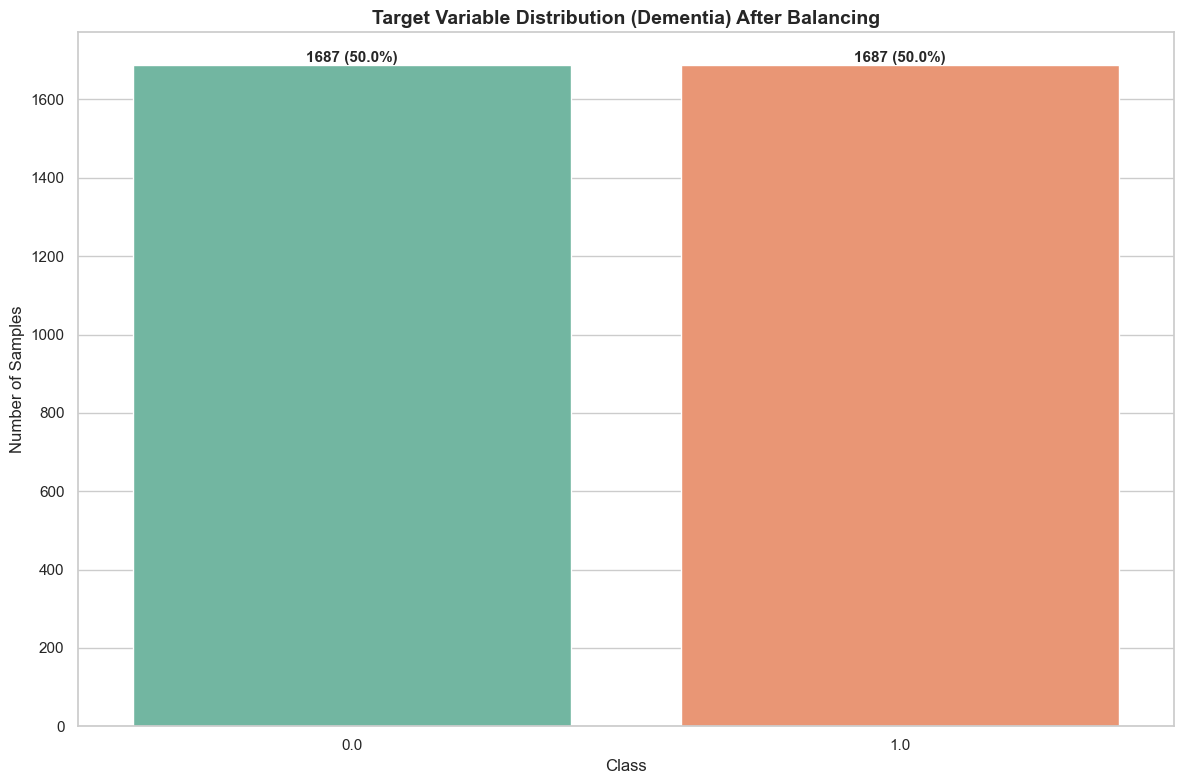

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentages
target_counts = df_final['dementia_all'].value_counts()
target_percent = df_final['dementia_all'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=target_counts.index,
    y=target_counts.values,
    palette="Set2"
)

# Annotate counts + percentages
for i, label in enumerate(target_counts.index):
    ax.text(
        i,
        target_counts.values[i],
        f"{target_counts.values[i]} ({target_percent[label]:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold"
    )

plt.title("Target Variable Distribution (Dementia) After Balancing", fontsize=14, fontweight="bold")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()


In [57]:
X=df_final.drop(columns=['dementia_all'])
y=df_final['dementia_all']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [60]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values if hasattr(y_train, "values") else y_train,
                          dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values if hasattr(y_test, "values") else y_test,
                         dtype=torch.float32).view(-1, 1)


In [61]:
import torch
import torch.nn as nn
import torch.optim as optim

class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        
        # Defining the layers
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.network(x)

# 1. Initialize the model
input_shape = X_train.shape[1]
model = BinaryClassifier(input_dim=input_shape)

# 2. Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 3. Define Optimizer (Adam) and Loss (Binary Cross Entropy)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.BCELoss()

print(model)

BinaryClassifier(
  (network): Sequential(
    (0): Linear(in_features=17, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=64, out_features=32, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=32, out_features=1, bias=True)
    (13): Sigmoid()
  )
)


In [62]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# -------------------------------------------------
# DataLoaders
# -------------------------------------------------
train_loader = DataLoader(
    TensorDataset(X_train_t, y_train_t),
    batch_size=32,
    shuffle=True
)

val_loader = DataLoader(
    TensorDataset(X_test_t, y_test_t),
    batch_size=32
)

# -------------------------------------------------
# Training Settings
# -------------------------------------------------
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# -------------------------------------------------
# History Storage
# -------------------------------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []

# -------------------------------------------------
# Training Loop (Epoch-wise Output)
# -------------------------------------------------
for epoch in range(epochs):

    # ===== TRAINING =====
    model.train()
    train_loss, train_correct = 0.0, 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).view(-1, 1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        train_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_correct / len(train_loader.dataset)

    # ===== VALIDATION =====
    model.eval()
    val_loss, val_correct = 0.0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device).view(-1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader.dataset)
    avg_val_acc = val_correct / len(val_loader.dataset)

    # ===== STORE HISTORY =====
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accs.append(avg_train_acc)
    val_accs.append(avg_val_acc)

    # ===== KERAS-STYLE EPOCH PRINT =====
    print(
        f"Epoch {epoch+1}/{epochs} - "
        f"loss: {avg_train_loss:.4f} - "
        f"acc: {avg_train_acc:.4f} - "
        f"val_loss: {avg_val_loss:.4f} - "
        f"val_acc: {avg_val_acc:.4f}"
    )


Epoch 1/100 - loss: 0.6827 - acc: 0.6065 - val_loss: 0.6628 - val_acc: 0.7556
Epoch 2/100 - loss: 0.6202 - acc: 0.7555 - val_loss: 0.5430 - val_acc: 0.7704
Epoch 3/100 - loss: 0.4914 - acc: 0.7988 - val_loss: 0.4243 - val_acc: 0.8089
Epoch 4/100 - loss: 0.4176 - acc: 0.8336 - val_loss: 0.3795 - val_acc: 0.8311
Epoch 5/100 - loss: 0.3764 - acc: 0.8499 - val_loss: 0.3613 - val_acc: 0.8296
Epoch 6/100 - loss: 0.3672 - acc: 0.8555 - val_loss: 0.3473 - val_acc: 0.8459
Epoch 7/100 - loss: 0.3532 - acc: 0.8622 - val_loss: 0.3413 - val_acc: 0.8474
Epoch 8/100 - loss: 0.3432 - acc: 0.8599 - val_loss: 0.3388 - val_acc: 0.8430
Epoch 9/100 - loss: 0.3366 - acc: 0.8685 - val_loss: 0.3222 - val_acc: 0.8563
Epoch 10/100 - loss: 0.3295 - acc: 0.8714 - val_loss: 0.3172 - val_acc: 0.8563
Epoch 11/100 - loss: 0.3262 - acc: 0.8718 - val_loss: 0.3157 - val_acc: 0.8607
Epoch 12/100 - loss: 0.3210 - acc: 0.8777 - val_loss: 0.3081 - val_acc: 0.8637
Epoch 13/100 - loss: 0.3154 - acc: 0.8788 - val_loss: 0.3015 

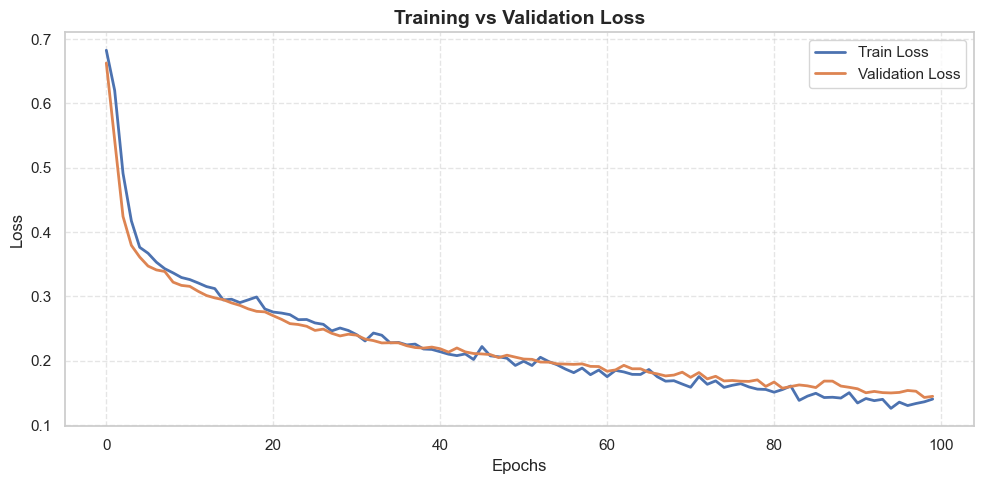

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", linewidth=2)
plt.plot(val_losses, label="Validation Loss", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


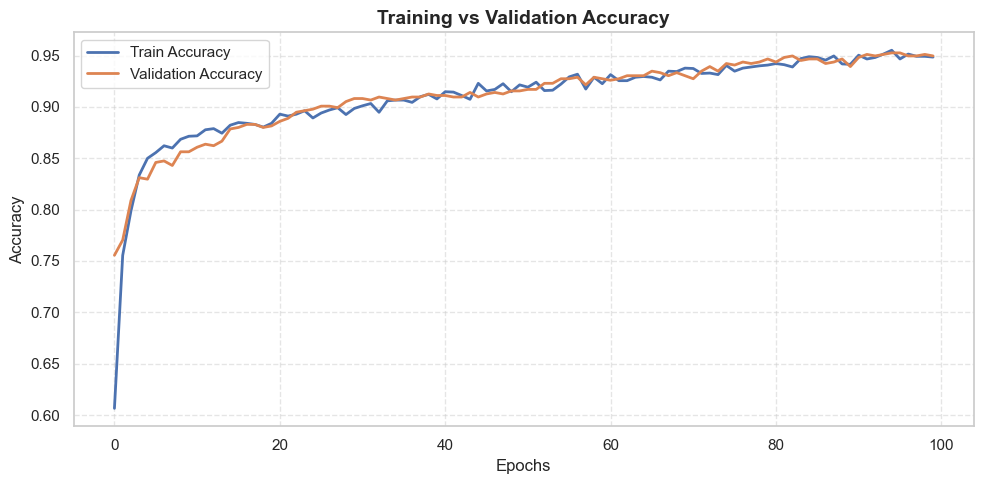

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label="Train Accuracy", linewidth=2)
plt.plot(val_accs, label="Validation Accuracy", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


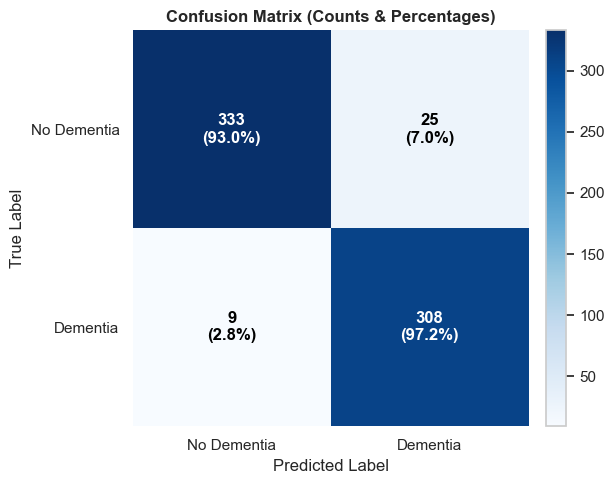

In [65]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        preds = (outputs > 0.5).int()

        y_pred.extend(preds.cpu().numpy().flatten())
        y_true.extend(labels.cpu().numpy().flatten())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert to percentages
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")
plt.colorbar(fraction=0.046, pad=0.04)

plt.xticks([0, 1], ["No Dementia", "Dementia"])
plt.yticks([0, 1], ["No Dementia", "Dementia"])

# Remove grid and spines (THIS removes the boxes)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Annotate
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i,
            f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)",
            ha="center",
            va="center",
            fontsize=12,
            fontweight="bold",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Counts & Percentages)", fontweight="bold")
plt.tight_layout()
plt.show()


In [66]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, cohen_kappa_score
)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)

print("📊 Evaluation Metrics")
print(f"Accuracy        : {accuracy:.4f}")
print(f"Precision       : {precision:.4f}")
print(f"Recall          : {recall:.4f}")
print(f"F1 Score        : {f1:.4f}")
print(f"Cohen’s Kappa   : {kappa:.4f}")


📊 Evaluation Metrics
Accuracy        : 0.9496
Precision       : 0.9249
Recall          : 0.9716
F1 Score        : 0.9477
Cohen’s Kappa   : 0.8992


### Altering dropout

In [67]:
import torch
import torch.nn as nn
import torch.optim as optim

class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        
        # Defining the layers
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.network(x)

# 1. Initialize the model
input_shape = X_train.shape[1]
model = BinaryClassifier(input_dim=input_shape)

# 2. Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 3. Define Optimizer (Adam) and Loss (Binary Cross Entropy)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.BCELoss()

print(model)

BinaryClassifier(
  (network): Sequential(
    (0): Linear(in_features=17, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=64, out_features=32, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=32, out_features=1, bias=True)
    (13): Sigmoid()
  )
)


In [68]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# -------------------------------------------------
# DataLoaders
# -------------------------------------------------
train_loader = DataLoader(
    TensorDataset(X_train_t, y_train_t),
    batch_size=32,
    shuffle=True
)

val_loader = DataLoader(
    TensorDataset(X_test_t, y_test_t),
    batch_size=32
)

# -------------------------------------------------
# Training Settings
# -------------------------------------------------
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# -------------------------------------------------
# History Storage
# -------------------------------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []

# -------------------------------------------------
# Training Loop (Epoch-wise Output)
# -------------------------------------------------
for epoch in range(epochs):

    # ===== TRAINING =====
    model.train()
    train_loss, train_correct = 0.0, 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).view(-1, 1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        train_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_correct / len(train_loader.dataset)

    # ===== VALIDATION =====
    model.eval()
    val_loss, val_correct = 0.0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device).view(-1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader.dataset)
    avg_val_acc = val_correct / len(val_loader.dataset)

    # ===== STORE HISTORY =====
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accs.append(avg_train_acc)
    val_accs.append(avg_val_acc)

    # ===== KERAS-STYLE EPOCH PRINT =====
    print(
        f"Epoch {epoch+1}/{epochs} - "
        f"loss: {avg_train_loss:.4f} - "
        f"acc: {avg_train_acc:.4f} - "
        f"val_loss: {avg_val_loss:.4f} - "
        f"val_acc: {avg_val_acc:.4f}"
    )


Epoch 1/100 - loss: 0.6770 - acc: 0.5128 - val_loss: 0.6368 - val_acc: 0.7126
Epoch 2/100 - loss: 0.5908 - acc: 0.7266 - val_loss: 0.5177 - val_acc: 0.8163
Epoch 3/100 - loss: 0.4816 - acc: 0.8247 - val_loss: 0.4254 - val_acc: 0.8148
Epoch 4/100 - loss: 0.4007 - acc: 0.8448 - val_loss: 0.3799 - val_acc: 0.8326
Epoch 5/100 - loss: 0.3673 - acc: 0.8577 - val_loss: 0.3545 - val_acc: 0.8400
Epoch 6/100 - loss: 0.3458 - acc: 0.8659 - val_loss: 0.3458 - val_acc: 0.8548
Epoch 7/100 - loss: 0.3298 - acc: 0.8655 - val_loss: 0.3317 - val_acc: 0.8593
Epoch 8/100 - loss: 0.3305 - acc: 0.8674 - val_loss: 0.3207 - val_acc: 0.8593
Epoch 9/100 - loss: 0.3115 - acc: 0.8744 - val_loss: 0.3091 - val_acc: 0.8681
Epoch 10/100 - loss: 0.3080 - acc: 0.8785 - val_loss: 0.3008 - val_acc: 0.8711
Epoch 11/100 - loss: 0.2989 - acc: 0.8807 - val_loss: 0.2859 - val_acc: 0.8830
Epoch 12/100 - loss: 0.2837 - acc: 0.8863 - val_loss: 0.2767 - val_acc: 0.8830
Epoch 13/100 - loss: 0.2721 - acc: 0.8940 - val_loss: 0.2687 

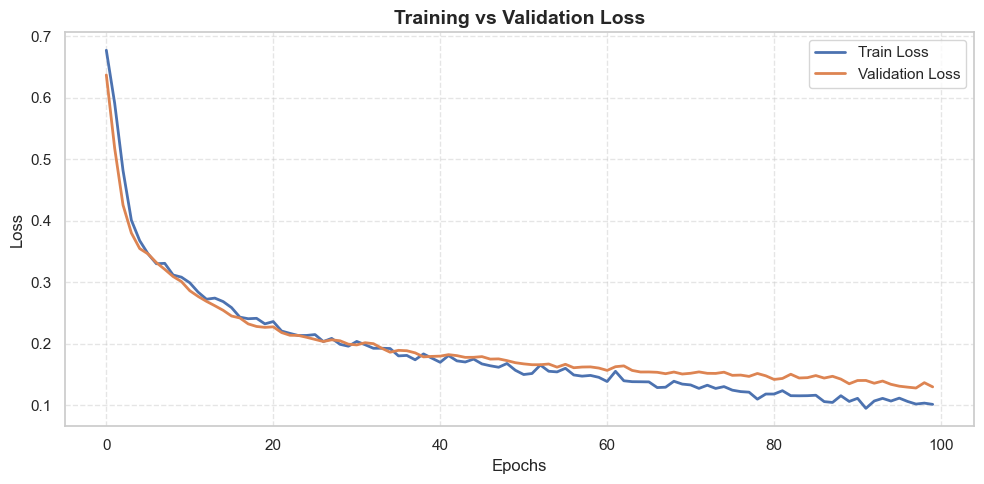

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", linewidth=2)
plt.plot(val_losses, label="Validation Loss", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


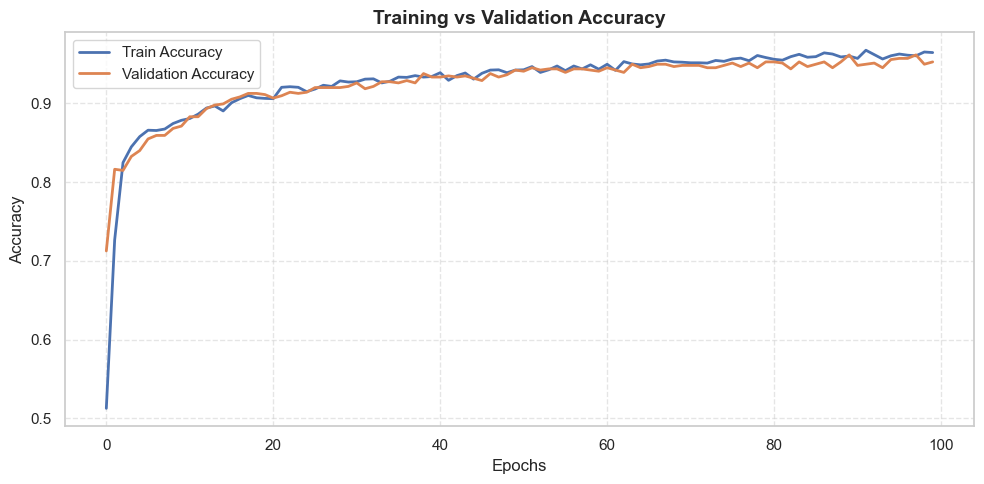

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label="Train Accuracy", linewidth=2)
plt.plot(val_accs, label="Validation Accuracy", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


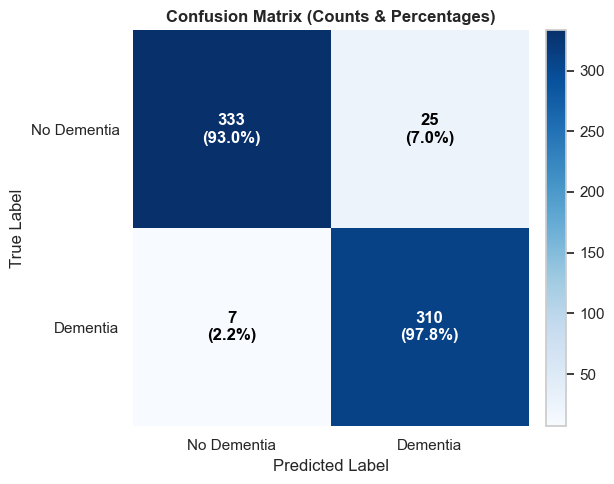

In [71]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        preds = (outputs > 0.5).int()

        y_pred.extend(preds.cpu().numpy().flatten())
        y_true.extend(labels.cpu().numpy().flatten())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert to percentages
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")
plt.colorbar(fraction=0.046, pad=0.04)

plt.xticks([0, 1], ["No Dementia", "Dementia"])
plt.yticks([0, 1], ["No Dementia", "Dementia"])

# Remove grid and spines (THIS removes the boxes)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Annotate
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i,
            f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)",
            ha="center",
            va="center",
            fontsize=12,
            fontweight="bold",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Counts & Percentages)", fontweight="bold")
plt.tight_layout()
plt.show()


In [72]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, cohen_kappa_score
)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)

print("📊 Evaluation Metrics")
print(f"Accuracy        : {accuracy:.4f}")
print(f"Precision       : {precision:.4f}")
print(f"Recall          : {recall:.4f}")
print(f"F1 Score        : {f1:.4f}")
print(f"Cohen’s Kappa   : {kappa:.4f}")


📊 Evaluation Metrics
Accuracy        : 0.9526
Precision       : 0.9254
Recall          : 0.9779
F1 Score        : 0.9509
Cohen’s Kappa   : 0.9051


### Using AdamW Optimizer

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim

class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        
        # Defining the layers
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.network(x)

# 1. Initialize the model
input_shape = X_train.shape[1]
model = BinaryClassifier(input_dim=input_shape)

# 2. Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 3. Define Optimizer (Adam) and Loss (Binary Cross Entropy)
optimizer = optim.AdamW(model.parameters(), lr=0.0001)
criterion = nn.BCELoss()

print(model)

BinaryClassifier(
  (network): Sequential(
    (0): Linear(in_features=17, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=64, out_features=32, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=32, out_features=1, bias=True)
    (13): Sigmoid()
  )
)


In [74]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# -------------------------------------------------
# DataLoaders
# -------------------------------------------------
train_loader = DataLoader(
    TensorDataset(X_train_t, y_train_t),
    batch_size=32,
    shuffle=True
)

val_loader = DataLoader(
    TensorDataset(X_test_t, y_test_t),
    batch_size=32
)

# -------------------------------------------------
# Training Settings
# -------------------------------------------------
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# -------------------------------------------------
# History Storage
# -------------------------------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []

# -------------------------------------------------
# Training Loop (Epoch-wise Output)
# -------------------------------------------------
for epoch in range(epochs):

    # ===== TRAINING =====
    model.train()
    train_loss, train_correct = 0.0, 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).view(-1, 1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        train_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_correct / len(train_loader.dataset)

    # ===== VALIDATION =====
    model.eval()
    val_loss, val_correct = 0.0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device).view(-1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader.dataset)
    avg_val_acc = val_correct / len(val_loader.dataset)

    # ===== STORE HISTORY =====
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accs.append(avg_train_acc)
    val_accs.append(avg_val_acc)

    # ===== KERAS-STYLE EPOCH PRINT =====
    print(
        f"Epoch {epoch+1}/{epochs} - "
        f"loss: {avg_train_loss:.4f} - "
        f"acc: {avg_train_acc:.4f} - "
        f"val_loss: {avg_val_loss:.4f} - "
        f"val_acc: {avg_val_acc:.4f}"
    )


Epoch 1/100 - loss: 0.6831 - acc: 0.6647 - val_loss: 0.6624 - val_acc: 0.7778
Epoch 2/100 - loss: 0.5987 - acc: 0.7925 - val_loss: 0.5032 - val_acc: 0.7941
Epoch 3/100 - loss: 0.4365 - acc: 0.8210 - val_loss: 0.4019 - val_acc: 0.8148
Epoch 4/100 - loss: 0.3803 - acc: 0.8418 - val_loss: 0.3723 - val_acc: 0.8341
Epoch 5/100 - loss: 0.3634 - acc: 0.8555 - val_loss: 0.3567 - val_acc: 0.8415
Epoch 6/100 - loss: 0.3487 - acc: 0.8614 - val_loss: 0.3466 - val_acc: 0.8400
Epoch 7/100 - loss: 0.3363 - acc: 0.8666 - val_loss: 0.3392 - val_acc: 0.8474
Epoch 8/100 - loss: 0.3328 - acc: 0.8703 - val_loss: 0.3302 - val_acc: 0.8504
Epoch 9/100 - loss: 0.3176 - acc: 0.8714 - val_loss: 0.3230 - val_acc: 0.8489
Epoch 10/100 - loss: 0.3149 - acc: 0.8788 - val_loss: 0.3120 - val_acc: 0.8593
Epoch 11/100 - loss: 0.3073 - acc: 0.8766 - val_loss: 0.3101 - val_acc: 0.8548
Epoch 12/100 - loss: 0.3031 - acc: 0.8811 - val_loss: 0.3077 - val_acc: 0.8533
Epoch 13/100 - loss: 0.2946 - acc: 0.8822 - val_loss: 0.2989 

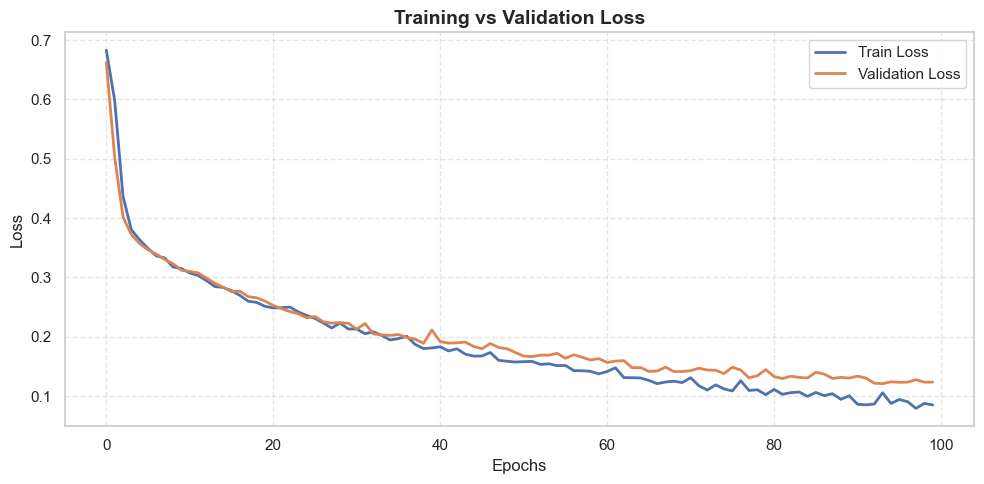

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", linewidth=2)
plt.plot(val_losses, label="Validation Loss", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


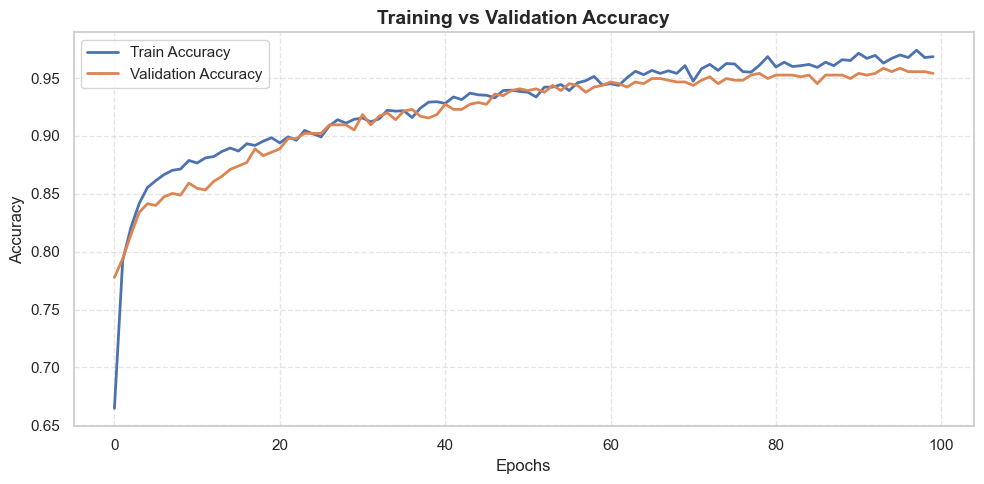

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label="Train Accuracy", linewidth=2)
plt.plot(val_accs, label="Validation Accuracy", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


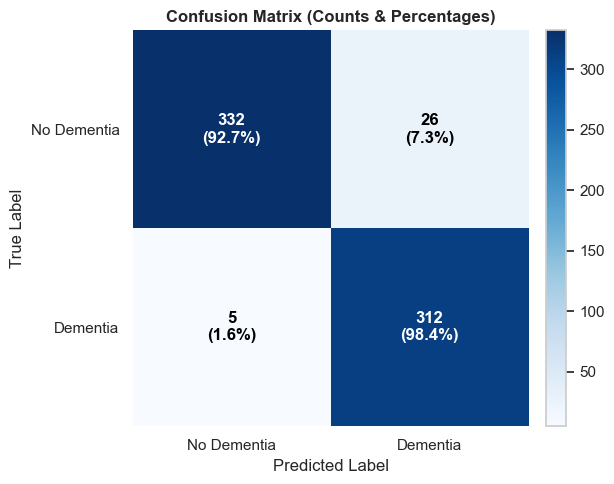

In [77]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        preds = (outputs > 0.5).int()

        y_pred.extend(preds.cpu().numpy().flatten())
        y_true.extend(labels.cpu().numpy().flatten())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert to percentages
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")
plt.colorbar(fraction=0.046, pad=0.04)

plt.xticks([0, 1], ["No Dementia", "Dementia"])
plt.yticks([0, 1], ["No Dementia", "Dementia"])

# Remove grid and spines (THIS removes the boxes)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Annotate
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i,
            f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)",
            ha="center",
            va="center",
            fontsize=12,
            fontweight="bold",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Counts & Percentages)", fontweight="bold")
plt.tight_layout()
plt.show()


In [78]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, cohen_kappa_score
)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)

print("📊 Evaluation Metrics")
print(f"Accuracy        : {accuracy:.4f}")
print(f"Precision       : {precision:.4f}")
print(f"Recall          : {recall:.4f}")
print(f"F1 Score        : {f1:.4f}")
print(f"Cohen’s Kappa   : {kappa:.4f}")


📊 Evaluation Metrics
Accuracy        : 0.9541
Precision       : 0.9231
Recall          : 0.9842
F1 Score        : 0.9527
Cohen’s Kappa   : 0.9082


### Altering Learning Rate

In [79]:
import torch
import torch.nn as nn
import torch.optim as optim

class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        
        # Defining the layers
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.network(x)

# 1. Initialize the model
input_shape = X_train.shape[1]
model = BinaryClassifier(input_dim=input_shape)

# 2. Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 3. Define Optimizer (Adam) and Loss (Binary Cross Entropy)
optimizer = optim.AdamW(model.parameters(), lr=0.00055,weight_decay=1e-4)
criterion = nn.BCELoss()

print(model)

BinaryClassifier(
  (network): Sequential(
    (0): Linear(in_features=17, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=64, out_features=32, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=32, out_features=1, bias=True)
    (13): Sigmoid()
  )
)


In [80]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# -------------------------------------------------
# DataLoaders
# -------------------------------------------------
train_loader = DataLoader(
    TensorDataset(X_train_t, y_train_t),
    batch_size=32,
    shuffle=True
)

val_loader = DataLoader(
    TensorDataset(X_test_t, y_test_t),
    batch_size=32
)

# -------------------------------------------------
# Training Settings
# -------------------------------------------------
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# -------------------------------------------------
# History Storage
# -------------------------------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []

# -------------------------------------------------
# Training Loop (Epoch-wise Output)
# -------------------------------------------------
for epoch in range(epochs):

    # ===== TRAINING =====
    model.train()
    train_loss, train_correct = 0.0, 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).view(-1, 1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        train_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_correct / len(train_loader.dataset)

    # ===== VALIDATION =====
    model.eval()
    val_loss, val_correct = 0.0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device).view(-1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader.dataset)
    avg_val_acc = val_correct / len(val_loader.dataset)

    # ===== STORE HISTORY =====
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accs.append(avg_train_acc)
    val_accs.append(avg_val_acc)

    # ===== KERAS-STYLE EPOCH PRINT =====
    print(
        f"Epoch {epoch+1}/{epochs} - "
        f"loss: {avg_train_loss:.4f} - "
        f"acc: {avg_train_acc:.4f} - "
        f"val_loss: {avg_val_loss:.4f} - "
        f"val_acc: {avg_val_acc:.4f}"
    )


Epoch 1/100 - loss: 0.5240 - acc: 0.7818 - val_loss: 0.3857 - val_acc: 0.8119
Epoch 2/100 - loss: 0.3463 - acc: 0.8640 - val_loss: 0.3208 - val_acc: 0.8533
Epoch 3/100 - loss: 0.3073 - acc: 0.8781 - val_loss: 0.2880 - val_acc: 0.8681
Epoch 4/100 - loss: 0.2657 - acc: 0.8918 - val_loss: 0.2645 - val_acc: 0.8904
Epoch 5/100 - loss: 0.2430 - acc: 0.9011 - val_loss: 0.2482 - val_acc: 0.8933
Epoch 6/100 - loss: 0.2339 - acc: 0.9055 - val_loss: 0.2115 - val_acc: 0.9156
Epoch 7/100 - loss: 0.2129 - acc: 0.9137 - val_loss: 0.2344 - val_acc: 0.8993
Epoch 8/100 - loss: 0.1993 - acc: 0.9248 - val_loss: 0.2192 - val_acc: 0.9111
Epoch 9/100 - loss: 0.2033 - acc: 0.9170 - val_loss: 0.1913 - val_acc: 0.9304
Epoch 10/100 - loss: 0.1854 - acc: 0.9278 - val_loss: 0.2007 - val_acc: 0.9200
Epoch 11/100 - loss: 0.1750 - acc: 0.9318 - val_loss: 0.1831 - val_acc: 0.9304
Epoch 12/100 - loss: 0.1660 - acc: 0.9359 - val_loss: 0.1762 - val_acc: 0.9333
Epoch 13/100 - loss: 0.1524 - acc: 0.9470 - val_loss: 0.1711 

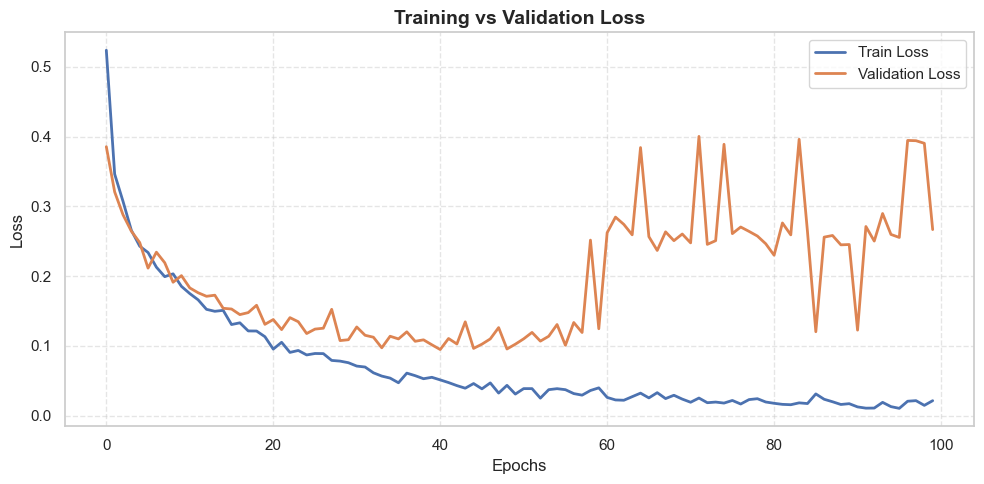

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", linewidth=2)
plt.plot(val_losses, label="Validation Loss", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


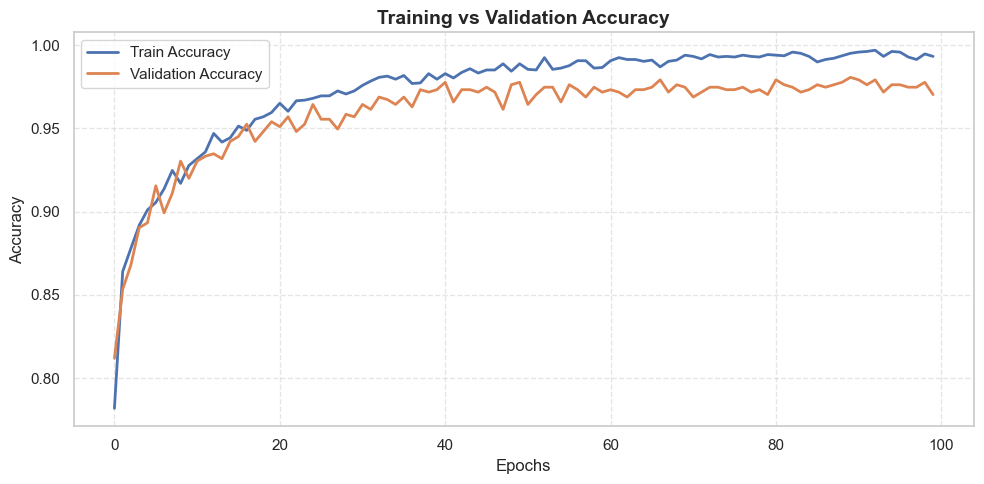

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label="Train Accuracy", linewidth=2)
plt.plot(val_accs, label="Validation Accuracy", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


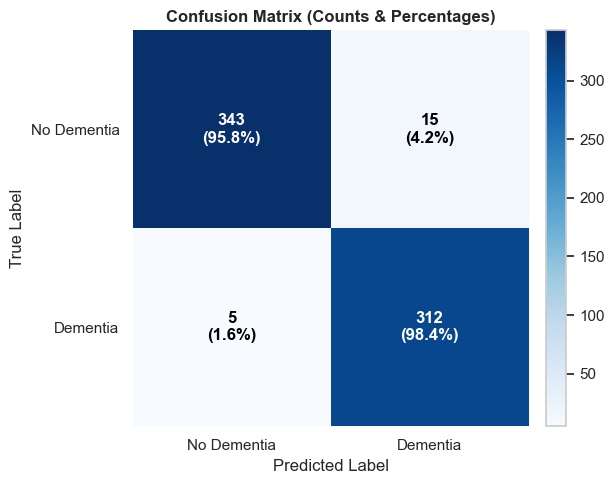

In [83]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        preds = (outputs > 0.5).int()

        y_pred.extend(preds.cpu().numpy().flatten())
        y_true.extend(labels.cpu().numpy().flatten())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert to percentages
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")
plt.colorbar(fraction=0.046, pad=0.04)

plt.xticks([0, 1], ["No Dementia", "Dementia"])
plt.yticks([0, 1], ["No Dementia", "Dementia"])

# Remove grid and spines (THIS removes the boxes)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Annotate
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i,
            f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)",
            ha="center",
            va="center",
            fontsize=12,
            fontweight="bold",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Counts & Percentages)", fontweight="bold")
plt.tight_layout()
plt.show()


In [84]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, cohen_kappa_score
)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)

print("📊 Evaluation Metrics")
print(f"Accuracy        : {accuracy:.4f}")
print(f"Precision       : {precision:.4f}")
print(f"Recall          : {recall:.4f}")
print(f"F1 Score        : {f1:.4f}")
print(f"Cohen’s Kappa   : {kappa:.4f}")


📊 Evaluation Metrics
Accuracy        : 0.9704
Precision       : 0.9541
Recall          : 0.9842
F1 Score        : 0.9689
Cohen’s Kappa   : 0.9406


### PSO

In [85]:
pip install pyswarms

Note: you may need to restart the kernel to use updated packages.


In [86]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values if hasattr(y_train, "values") else y_train,
                          dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values if hasattr(y_test, "values") else y_test,
                         dtype=torch.float32).view(-1, 1)


In [87]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from pyswarms.single.global_best import GlobalBestPSO

# --- 1. Tensor Preparation ---
# Ensure these variables match your environment
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Moving data to device once before optimization starts
X_train_gpu = X_train_t.to(device)
y_train_gpu = y_train_t.to(device)
X_test_gpu = X_test_t.to(device)
y_test_gpu = y_test_t.to(device)

def create_model_torch(params):
    n1, n2, n3, n4, d1, d2, d3, d4, lr = params
    
    # Define Architecture based on PSO suggestion
    model = nn.Sequential(
        nn.Linear(X_train_gpu.shape[1], int(n1)),
        nn.ReLU(),
        nn.Dropout(d1),
        nn.Linear(int(n1), int(n2)),
        nn.ReLU(),
        nn.Dropout(d2),
        nn.Linear(int(n2), int(n3)),
        nn.ReLU(),
        nn.Dropout(d3),
        nn.Linear(int(n3), int(n4)),
        nn.ReLU(),
        nn.Dropout(d4),
        nn.Linear(int(n4), 1),
        nn.Sigmoid()
    ).to(device)

    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    criterion = nn.BCELoss()
    
    # Early Stopping Logic
    best_val_loss = float('inf')
    patience = 3
    trigger_times = 0
    
    # DataLoader for the current particle's training run
    train_loader = DataLoader(
        TensorDataset(X_train_gpu, y_train_gpu), 
        batch_size=64, 
        shuffle=True
    )

    for epoch in range(30):
        model.train()
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
        
        # Validation pass (using X_test_gpu as validation)
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test_gpu)
            val_loss = criterion(val_outputs, y_test_gpu).item()
        
        # Check for improvement
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            trigger_times = 0
        else:
            trigger_times += 1
            if trigger_times >= patience:
                break
                
    return best_val_loss

def objective_function(hyperparams):
    # Process each set of hyperparameters in the swarm
    return np.array([create_model_torch(p) for p in hyperparams])

# --- 2. PSO Configuration ---
lower_bounds = [32, 32, 16, 16, 0.0, 0.0, 0.0, 0.0, 1e-4]
upper_bounds = [512, 512, 256, 256, 0.5, 0.5, 0.5, 0.5, 1e-2]
bounds = (lower_bounds, upper_bounds)

optimizer = GlobalBestPSO(
    n_particles=15, 
    dimensions=9, 
    options={'c1': 0.5, 'c2': 0.3, 'w': 0.9}, 
    bounds=bounds
)

# --- 3. Run Optimization ---
best_cost, best_pos = optimizer.optimize(objective_function, iters=20)

print("\n--- Optimization Complete ---")
print(f"Best Validation Loss: {best_cost:.4f}")
print(f"Best Neurons: {best_pos[0:4].astype(int)}")
print(f"Best Dropout: {best_pos[4:8]}")
print(f"Best Learning Rate: {best_pos[8]:.6f}")

2026-01-05 12:55:25,814 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=0.0958
2026-01-05 13:01:13,668 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.09583909809589386, best pos: [1.39803420e+02 3.83952849e+02 7.44791377e+01 1.77458775e+02
 1.79525575e-01 2.29842870e-01 1.54452956e-01 1.21915964e-01
 9.93767431e-04]



--- Optimization Complete ---
Best Validation Loss: 0.0958
Best Neurons: [139 383  74 177]
Best Dropout: [0.17952558 0.22984287 0.15445296 0.12191596]
Best Learning Rate: 0.000994


In [89]:
import torch
import torch.nn as nn
import torch.optim as optim

class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()

        self.network = nn.Sequential(
            # Layer 1
            nn.Linear(input_dim, 139),
            nn.ReLU(),
            nn.Dropout(0.17952558),

            # Layer 2
            nn.Linear(139, 383),
            nn.ReLU(),
            nn.Dropout(0.22984287),

            # Layer 3
            nn.Linear(383, 74),
            nn.ReLU(),
            nn.Dropout(0.15445296),

            # Layer 4
            nn.Linear(74, 177),
            nn.ReLU(),
            nn.Dropout(0.12191596),

            # Output layer
            nn.Linear(177, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)
# Input dimension
input_shape = X_train.shape[1]

# Initialize model
model = BinaryClassifier(input_dim=input_shape)

# Move to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


optimizer = optim.AdamW(
    model.parameters(),
    lr=0.000994,        # PSO-found learning rate
    weight_decay=1e-4   # keep as requested
)

criterion = nn.BCELoss()

print(model)

BinaryClassifier(
  (network): Sequential(
    (0): Linear(in_features=17, out_features=139, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.17952558, inplace=False)
    (3): Linear(in_features=139, out_features=383, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.22984287, inplace=False)
    (6): Linear(in_features=383, out_features=74, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.15445296, inplace=False)
    (9): Linear(in_features=74, out_features=177, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.12191596, inplace=False)
    (12): Linear(in_features=177, out_features=1, bias=True)
    (13): Sigmoid()
  )
)


In [90]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# -------------------------------------------------
# DataLoaders
# -------------------------------------------------
train_loader = DataLoader(
    TensorDataset(X_train_t, y_train_t),
    batch_size=32,
    shuffle=True
)

val_loader = DataLoader(
    TensorDataset(X_test_t, y_test_t),
    batch_size=32
)

# -------------------------------------------------
# Training Settings
# -------------------------------------------------
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# -------------------------------------------------
# History Storage
# -------------------------------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []

# -------------------------------------------------
# Training Loop (Epoch-wise Output)
# -------------------------------------------------
for epoch in range(epochs):

    # ===== TRAINING =====
    model.train()
    train_loss, train_correct = 0.0, 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).view(-1, 1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        train_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_correct / len(train_loader.dataset)

    # ===== VALIDATION =====
    model.eval()
    val_loss, val_correct = 0.0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device).view(-1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader.dataset)
    avg_val_acc = val_correct / len(val_loader.dataset)

    # ===== STORE HISTORY =====
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accs.append(avg_train_acc)
    val_accs.append(avg_val_acc)

    # ===== KERAS-STYLE EPOCH PRINT =====
    print(
        f"Epoch {epoch+1}/{epochs} - "
        f"loss: {avg_train_loss:.4f} - "
        f"acc: {avg_train_acc:.4f} - "
        f"val_loss: {avg_val_loss:.4f} - "
        f"val_acc: {avg_val_acc:.4f}"
    )


Epoch 1/100 - loss: 0.4404 - acc: 0.8096 - val_loss: 0.3258 - val_acc: 0.8504
Epoch 2/100 - loss: 0.2986 - acc: 0.8803 - val_loss: 0.3095 - val_acc: 0.8800
Epoch 3/100 - loss: 0.2528 - acc: 0.8959 - val_loss: 0.2359 - val_acc: 0.9096
Epoch 4/100 - loss: 0.2390 - acc: 0.8989 - val_loss: 0.2232 - val_acc: 0.9067
Epoch 5/100 - loss: 0.2084 - acc: 0.9114 - val_loss: 0.2294 - val_acc: 0.9067
Epoch 6/100 - loss: 0.1896 - acc: 0.9215 - val_loss: 0.1869 - val_acc: 0.9215
Epoch 7/100 - loss: 0.1699 - acc: 0.9355 - val_loss: 0.1768 - val_acc: 0.9378
Epoch 8/100 - loss: 0.1606 - acc: 0.9363 - val_loss: 0.1588 - val_acc: 0.9452
Epoch 9/100 - loss: 0.1413 - acc: 0.9444 - val_loss: 0.1388 - val_acc: 0.9496
Epoch 10/100 - loss: 0.1326 - acc: 0.9492 - val_loss: 0.1715 - val_acc: 0.9333
Epoch 11/100 - loss: 0.1217 - acc: 0.9541 - val_loss: 0.1847 - val_acc: 0.9319
Epoch 12/100 - loss: 0.1082 - acc: 0.9578 - val_loss: 0.1609 - val_acc: 0.9437
Epoch 13/100 - loss: 0.1063 - acc: 0.9574 - val_loss: 0.1164 

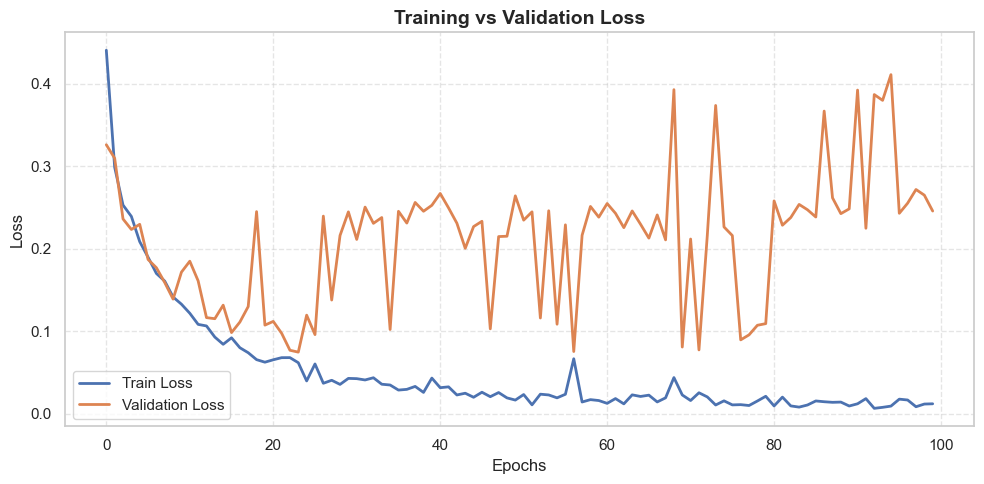

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", linewidth=2)
plt.plot(val_losses, label="Validation Loss", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


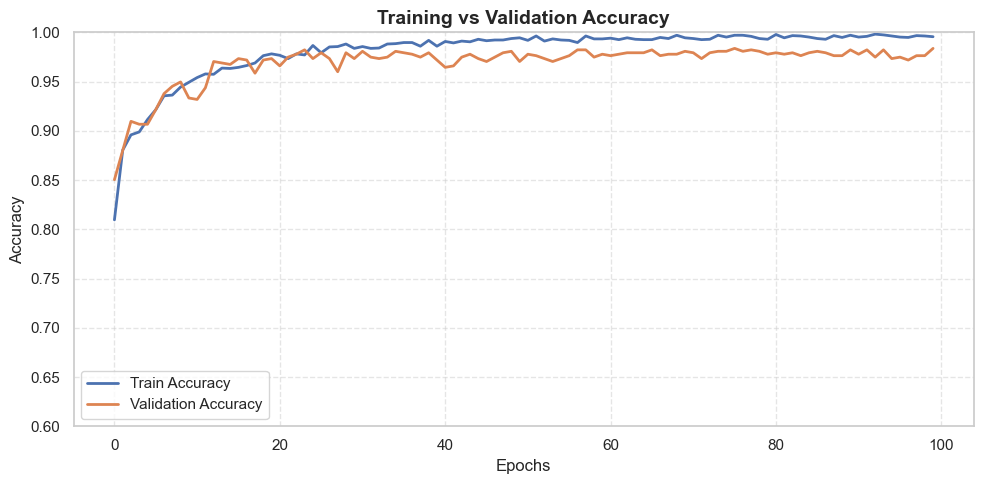

In [93]:
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label="Train Accuracy", linewidth=2)
plt.plot(val_accs, label="Validation Accuracy", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
plt.legend()
plt.ylim(0.6, 1.0)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


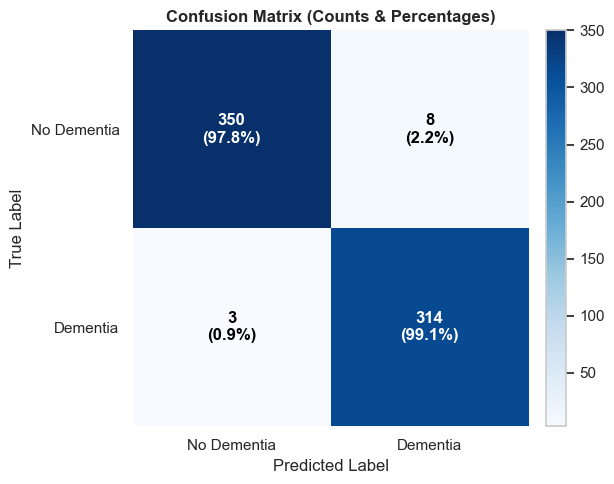

In [94]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        preds = (outputs > 0.5).int()

        y_pred.extend(preds.cpu().numpy().flatten())
        y_true.extend(labels.cpu().numpy().flatten())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert to percentages
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")
plt.colorbar(fraction=0.046, pad=0.04)

plt.xticks([0, 1], ["No Dementia", "Dementia"])
plt.yticks([0, 1], ["No Dementia", "Dementia"])

# Remove grid and spines (THIS removes the boxes)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Annotate
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i,
            f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)",
            ha="center",
            va="center",
            fontsize=12,
            fontweight="bold",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Counts & Percentages)", fontweight="bold")
plt.tight_layout()
plt.show()


In [95]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, cohen_kappa_score
)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)

print("📊 Evaluation Metrics")
print(f"Accuracy        : {accuracy:.4f}")
print(f"Precision       : {precision:.4f}")
print(f"Recall          : {recall:.4f}")
print(f"F1 Score        : {f1:.4f}")
print(f"Cohen’s Kappa   : {kappa:.4f}")


📊 Evaluation Metrics
Accuracy        : 0.9837
Precision       : 0.9752
Recall          : 0.9905
F1 Score        : 0.9828
Cohen’s Kappa   : 0.9673


### Applying Genetic Algorithm for feature selection

In [96]:
pip install deap

Note: you may need to restart the kernel to use updated packages.


In [97]:
import numpy as np
import random
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from deap import base, creator, tools, algorithms

# --------------------------
# Data Preparation (PyTorch conversion)
# --------------------------
# Assuming X and y are pandas DataFrames/Series
X_train_, X_val, y_train_, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert labels to PyTorch tensors once
y_train_ts = torch.FloatTensor(y_train_.values).view(-1, 1)
y_val_ts = torch.FloatTensor(y_val.values).view(-1, 1)

n_features = X.shape[1]

# --------------------------
# PyTorch ANN Model
# --------------------------
class SimpleANN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleANN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.net(x)

# --------------------------
# GA setup
# --------------------------
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# --------------------------
# Fitness function with PyTorch
# --------------------------
def eval_individual(individual):
    selected = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected) == 0:
        return 0., 

    # Prepare selected feature tensors
    X_sel_train = torch.FloatTensor(X_train_.iloc[:, selected].values)
    X_sel_val = torch.FloatTensor(X_val.iloc[:, selected].values)

    # Initialize model, loss, and optimizer
    model = SimpleANN(input_dim=len(selected))
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Create DataLoader for batching
    dataset = TensorDataset(X_sel_train, y_train_ts)
    loader = DataLoader(dataset, batch_size=64, shuffle=True)

    # Train loop (equivalent to model.fit)
    model.train()
    for epoch in range(15):
        for batch_x, batch_y in loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

    # Evaluation (equivalent to model.evaluate)
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_sel_val)
        # Calculate accuracy
        predicted = (val_outputs > 0.5).float()
        correct = (predicted == y_val_ts).sum().item()
        acc = correct / y_val_ts.size(0)

    return acc,

toolbox.register("evaluate", eval_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# --------------------------
# Run GA
# --------------------------
def run_ga(n_gen=10, pop_size=10):
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)

    algorithms.eaSimple(pop, toolbox,
                        cxpb=0.5, mutpb=0.2,
                        ngen=n_gen,
                        halloffame=hof,
                        verbose=True)

    return hof[0]

if __name__ == "__main__":
    best_features = run_ga(n_gen=5, pop_size=6)
    print("\nBest Feature Subset (binary mask):", best_features)
    print("Selected Feature Indices:", [i for i, bit in enumerate(best_features) if bit == 1])

gen	nevals
0  	6     
1  	3     
2  	2     
3  	4     
4  	2     
5  	0     

Best Feature Subset (binary mask): [0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]
Selected Feature Indices: [1, 2, 3, 4, 7, 8, 9, 11, 12, 13, 14, 16]


Selected Features: ['gender', 'educationyears', 'EF', 'PS', 'smoking', 'hypertension', 'hypercholesterolemia', 'fazekas_cat', 'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'CMB_count']


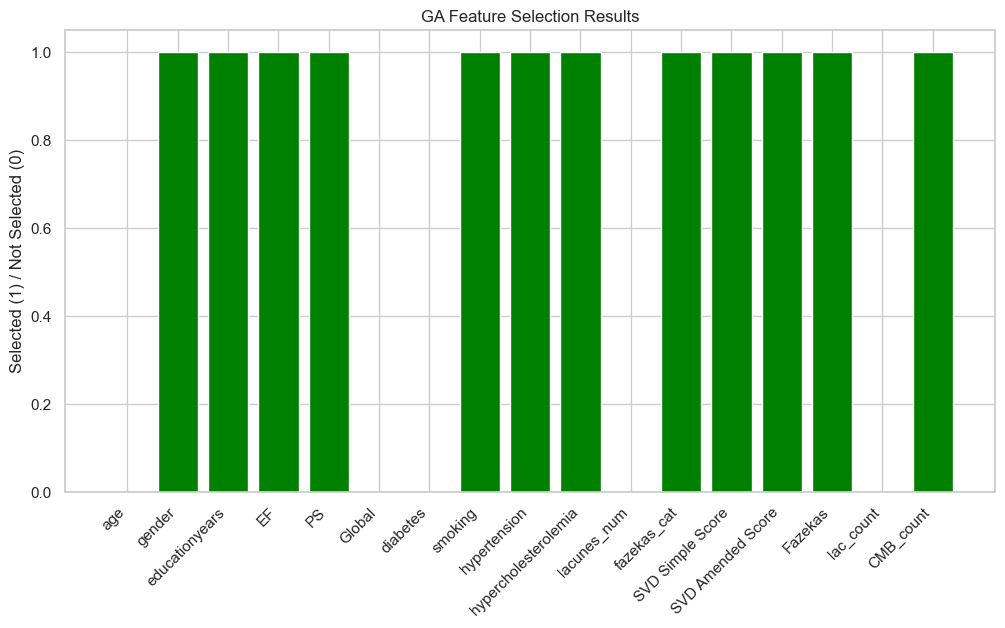

In [98]:
import matplotlib.pyplot as plt

# Suppose X is your original DataFrame
feature_names = X.columns

# Binary mask of selected features from GA
selected_mask = best_features  # [0, 1, 0, 1, 1, 1, 0, 1, ...]
selected_features = [feature_names[i] for i, bit in enumerate(selected_mask) if bit == 1]

print("Selected Features:", selected_features)

# Visualization
plt.figure(figsize=(12, 6))
colors = ['green' if bit == 1 else 'red' for bit in selected_mask]

plt.bar(feature_names, selected_mask, color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Selected (1) / Not Selected (0)")
plt.title("GA Feature Selection Results")
plt.show()


In [102]:
feature_names = X.columns

# GA-selected input features
selected_features = [feature_names[i] for i, bit in enumerate(best_features) if bit == 1]

# Explicitly add target column
selected_features_with_target = selected_features + ["dementia_all"]

print("Selected Features (Inputs):", selected_features)
print("Selected Features (With Target):", selected_features_with_target)


Selected Features (Inputs): ['gender', 'educationyears', 'EF', 'PS', 'smoking', 'hypertension', 'hypercholesterolemia', 'fazekas_cat', 'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'CMB_count']
Selected Features (With Target): ['gender', 'educationyears', 'EF', 'PS', 'smoking', 'hypertension', 'hypercholesterolemia', 'fazekas_cat', 'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'CMB_count', 'dementia_all']


In [106]:


df_ga = df[selected_features_with_target].copy()


In [107]:
df_ga.head()

,gender,educationyears,EF,PS,smoking,hypertension,hypercholesterolemia,fazekas_cat,SVD Simple Score,SVD Amended Score,Fazekas,CMB_count,dementia_all
0,1,11.0,-2.403333,-1.290000,0,1,1,1,3.0,7.0,3.0,1,0.0
1,1,10.0,1.280000,0.360000,1,1,1,0,2.0,3.0,1.0,1,0.0
2,1,8.0,-1.440000,-1.520000,2,1,1,0,1.0,2.0,1.0,0,0.0
3,1,9.0,0.130000,-2.136271,0,1,1,1,2.0,4.0,2.0,0,1.0
4,1,10.0,-0.920000,-1.493333,1,1,1,1,2.0,3.0,2.0,0,0.0


In [108]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
import pandas as pd

# ------------------------------
# 1️⃣ Separate features & target
# ------------------------------
X = df_ga.drop(columns=['dementia_all'])
y = df_ga['dementia_all']

print("Before Resampling:", X.shape, y.value_counts().to_dict())

# ------------------------------
# 2️⃣ Apply SMOTE-ENN
# ------------------------------
smote_enn = SMOTEENN(random_state=42)
X_enn, y_enn = smote_enn.fit_resample(X, y)

print("After SMOTE-ENN:", X_enn.shape, pd.Series(y_enn).value_counts().to_dict())

# ------------------------------
# 3️⃣ Apply SMOTE
# ------------------------------
smote = SMOTE(random_state=42)
X_final, y_final = smote.fit_resample(X_enn, y_enn)

print("After SMOTE:", X_final.shape, pd.Series(y_final).value_counts().to_dict())

# ------------------------------
# 4️⃣ Final DataFrame (Saved as df_final)
# ------------------------------
df_final_ga = pd.DataFrame(X_final, columns=X.columns)
df_final_ga['dementia_all'] = y_final

print("Final Balanced DF Shape:", df_final.shape)
df_final_ga.head()


Before Resampling: (1842, 12) {0.0: 1726, 1.0: 116}
After SMOTE-ENN: (2940, 12) {1.0: 1619, 0.0: 1321}
After SMOTE: (3238, 12) {0.0: 1619, 1.0: 1619}
Final Balanced DF Shape: (3374, 18)


,gender,educationyears,EF,PS,smoking,hypertension,hypercholesterolemia,fazekas_cat,SVD Simple Score,SVD Amended Score,Fazekas,CMB_count,dementia_all
0,1,10.0,1.28,0.360000,1,1,1,0,2.0,3.0,1.0,1,0.0
1,1,8.0,-1.44,-1.520000,2,1,1,0,1.0,2.0,1.0,0,0.0
2,1,10.0,-0.92,-1.493333,1,1,1,1,2.0,3.0,2.0,0,0.0
3,1,24.0,-0.38,-1.110000,1,1,1,1,0.0,2.0,2.0,0,0.0
4,1,19.0,0.61,-0.403333,2,1,1,1,2.0,3.0,2.0,1,0.0


2026-01-05 13:43:12,617 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\iyera\AppData\Local\Temp\ipykernel_10276\3536930987.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
2026-01-05 13:43:12,621 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


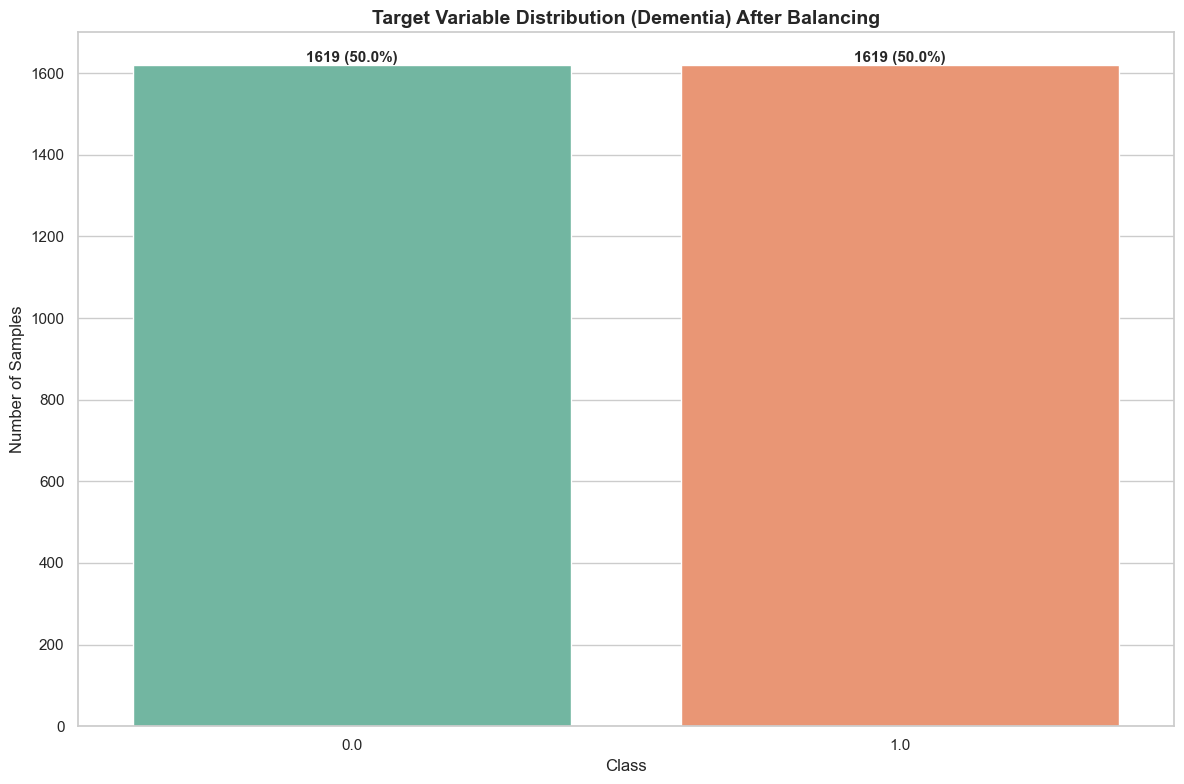

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentages
target_counts = df_final_ga['dementia_all'].value_counts()
target_percent = df_final_ga['dementia_all'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=target_counts.index,
    y=target_counts.values,
    palette="Set2"
)

# Annotate counts + percentages
for i, label in enumerate(target_counts.index):
    ax.text(
        i,
        target_counts.values[i],
        f"{target_counts.values[i]} ({target_percent[label]:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold"
    )

plt.title("Target Variable Distribution (Dementia) After Balancing", fontsize=14, fontweight="bold")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()


In [110]:
X=df_final_ga.drop(columns=['dementia_all'])
y=df_final_ga['dementia_all']

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [112]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [113]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values if hasattr(y_train, "values") else y_train,
                          dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values if hasattr(y_test, "values") else y_test,
                         dtype=torch.float32).view(-1, 1)


### Apply PSO to find optimal parameters on reduced fearures

In [114]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from pyswarms.single.global_best import GlobalBestPSO

# --- 1. Tensor Preparation ---
# Ensure these variables match your environment
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Moving data to device once before optimization starts
X_train_gpu = X_train_t.to(device)
y_train_gpu = y_train_t.to(device)
X_test_gpu = X_test_t.to(device)
y_test_gpu = y_test_t.to(device)

def create_model_torch(params):
    n1, n2, n3, n4, d1, d2, d3, d4, lr = params
    
    # Define Architecture based on PSO suggestion
    model = nn.Sequential(
        nn.Linear(X_train_gpu.shape[1], int(n1)),
        nn.ReLU(),
        nn.Dropout(d1),
        nn.Linear(int(n1), int(n2)),
        nn.ReLU(),
        nn.Dropout(d2),
        nn.Linear(int(n2), int(n3)),
        nn.ReLU(),
        nn.Dropout(d3),
        nn.Linear(int(n3), int(n4)),
        nn.ReLU(),
        nn.Dropout(d4),
        nn.Linear(int(n4), 1),
        nn.Sigmoid()
    ).to(device)

    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    criterion = nn.BCELoss()
    
    # Early Stopping Logic
    best_val_loss = float('inf')
    patience = 3
    trigger_times = 0
    
    # DataLoader for the current particle's training run
    train_loader = DataLoader(
        TensorDataset(X_train_gpu, y_train_gpu), 
        batch_size=64, 
        shuffle=True
    )

    for epoch in range(30):
        model.train()
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
        
        # Validation pass (using X_test_gpu as validation)
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test_gpu)
            val_loss = criterion(val_outputs, y_test_gpu).item()
        
        # Check for improvement
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            trigger_times = 0
        else:
            trigger_times += 1
            if trigger_times >= patience:
                break
                
    return best_val_loss

def objective_function(hyperparams):
    # Process each set of hyperparameters in the swarm
    return np.array([create_model_torch(p) for p in hyperparams])

# --- 2. PSO Configuration ---
lower_bounds = [32, 32, 16, 16, 0.0, 0.0, 0.0, 0.0, 1e-4]
upper_bounds = [512, 512, 256, 256, 0.5, 0.5, 0.5, 0.5, 1e-2]
bounds = (lower_bounds, upper_bounds)

optimizer = GlobalBestPSO(
    n_particles=15, 
    dimensions=9, 
    options={'c1': 0.5, 'c2': 0.3, 'w': 0.9}, 
    bounds=bounds
)

# --- 3. Run Optimization ---
best_cost, best_pos = optimizer.optimize(objective_function, iters=20)

print("\n--- Optimization Complete ---")
print(f"Best Validation Loss: {best_cost:.4f}")
print(f"Best Neurons: {best_pos[0:4].astype(int)}")
print(f"Best Dropout: {best_pos[4:8]}")
print(f"Best Learning Rate: {best_pos[8]:.6f}")

2026-01-05 13:44:27,408 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=0.0642
2026-01-05 13:50:23,848 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.06417657434940338, best pos: [2.93025086e+02 3.06647806e+02 1.89456732e+02 1.40171012e+02
 1.79355878e-01 3.75165566e-03 1.68015273e-01 2.35650060e-01
 7.26990002e-04]



--- Optimization Complete ---
Best Validation Loss: 0.0642
Best Neurons: [293 306 189 140]
Best Dropout: [0.17935588 0.00375166 0.16801527 0.23565006]
Best Learning Rate: 0.000727


In [115]:
import torch
import torch.nn as nn
import torch.optim as optim

class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()

        self.network = nn.Sequential(
            # Layer 1
            nn.Linear(input_dim, 293),
            nn.ReLU(),
            nn.Dropout(0.17935588),

            # Layer 2
            nn.Linear(293, 306),
            nn.ReLU(),
            nn.Dropout(0.00375166),

            # Layer 3
            nn.Linear(306, 189),
            nn.ReLU(),
            nn.Dropout(0.16801527),

            # Layer 4
            nn.Linear(189, 140),
            nn.ReLU(),
            nn.Dropout(0.23565006),

            # Output Layer
            nn.Linear(140, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)
# Initialize model
input_shape = X_train.shape[1]
model = BinaryClassifier(input_dim=input_shape)

# Move to GPU / CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = optim.AdamW(
    model.parameters(),
    lr=0.000727,      # PSO-found learning rate
    weight_decay=1e-4
)

criterion = nn.BCELoss()
print(model)

BinaryClassifier(
  (network): Sequential(
    (0): Linear(in_features=12, out_features=293, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.17935588, inplace=False)
    (3): Linear(in_features=293, out_features=306, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.00375166, inplace=False)
    (6): Linear(in_features=306, out_features=189, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.16801527, inplace=False)
    (9): Linear(in_features=189, out_features=140, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.23565006, inplace=False)
    (12): Linear(in_features=140, out_features=1, bias=True)
    (13): Sigmoid()
  )
)


In [116]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# -------------------------------------------------
# DataLoaders
# -------------------------------------------------
train_loader = DataLoader(
    TensorDataset(X_train_t, y_train_t),
    batch_size=32,
    shuffle=True
)

val_loader = DataLoader(
    TensorDataset(X_test_t, y_test_t),
    batch_size=32
)

# -------------------------------------------------
# Training Settings
# -------------------------------------------------
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# -------------------------------------------------
# History Storage
# -------------------------------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []

# -------------------------------------------------
# Training Loop (Epoch-wise Output)
# -------------------------------------------------
for epoch in range(epochs):

    # ===== TRAINING =====
    model.train()
    train_loss, train_correct = 0.0, 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).view(-1, 1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        train_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_correct / len(train_loader.dataset)

    # ===== VALIDATION =====
    model.eval()
    val_loss, val_correct = 0.0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device).view(-1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_correct += ((outputs > 0.5).float() == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader.dataset)
    avg_val_acc = val_correct / len(val_loader.dataset)

    # ===== STORE HISTORY =====
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accs.append(avg_train_acc)
    val_accs.append(avg_val_acc)

    # ===== KERAS-STYLE EPOCH PRINT =====
    print(
        f"Epoch {epoch+1}/{epochs} - "
        f"loss: {avg_train_loss:.4f} - "
        f"acc: {avg_train_acc:.4f} - "
        f"val_loss: {avg_val_loss:.4f} - "
        f"val_acc: {avg_val_acc:.4f}"
    )


Epoch 1/100 - loss: 0.4754 - acc: 0.7772 - val_loss: 0.4036 - val_acc: 0.8272
Epoch 2/100 - loss: 0.3364 - acc: 0.8564 - val_loss: 0.3506 - val_acc: 0.8534
Epoch 3/100 - loss: 0.2994 - acc: 0.8842 - val_loss: 0.2764 - val_acc: 0.8843
Epoch 4/100 - loss: 0.2537 - acc: 0.9042 - val_loss: 0.2712 - val_acc: 0.8796
Epoch 5/100 - loss: 0.2137 - acc: 0.9201 - val_loss: 0.2038 - val_acc: 0.9290
Epoch 6/100 - loss: 0.1954 - acc: 0.9251 - val_loss: 0.2786 - val_acc: 0.8981
Epoch 7/100 - loss: 0.1767 - acc: 0.9347 - val_loss: 0.1956 - val_acc: 0.9244
Epoch 8/100 - loss: 0.1510 - acc: 0.9440 - val_loss: 0.1806 - val_acc: 0.9228
Epoch 9/100 - loss: 0.1394 - acc: 0.9494 - val_loss: 0.1737 - val_acc: 0.9398
Epoch 10/100 - loss: 0.1292 - acc: 0.9494 - val_loss: 0.2122 - val_acc: 0.9182
Epoch 11/100 - loss: 0.1214 - acc: 0.9556 - val_loss: 0.1447 - val_acc: 0.9398
Epoch 12/100 - loss: 0.0885 - acc: 0.9633 - val_loss: 0.1510 - val_acc: 0.9398
Epoch 13/100 - loss: 0.0916 - acc: 0.9645 - val_loss: 0.1488 

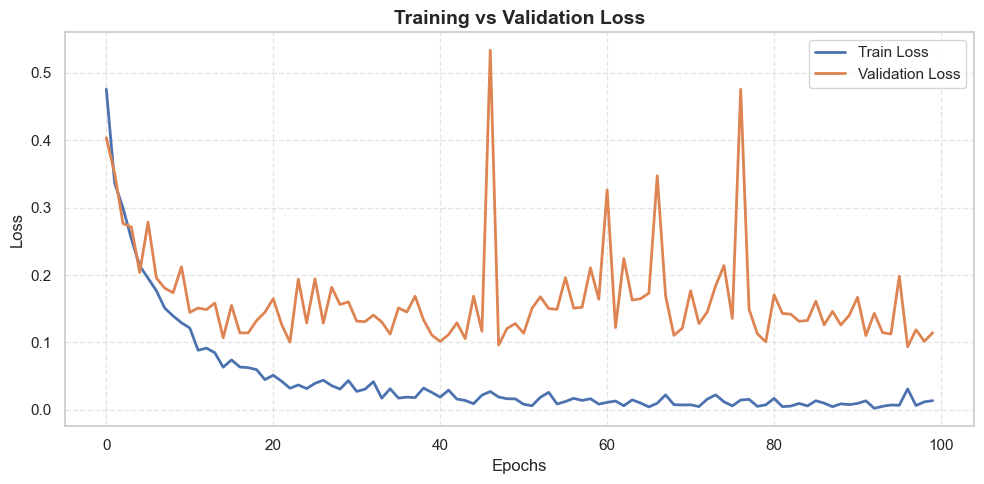

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", linewidth=2)
plt.plot(val_losses, label="Validation Loss", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


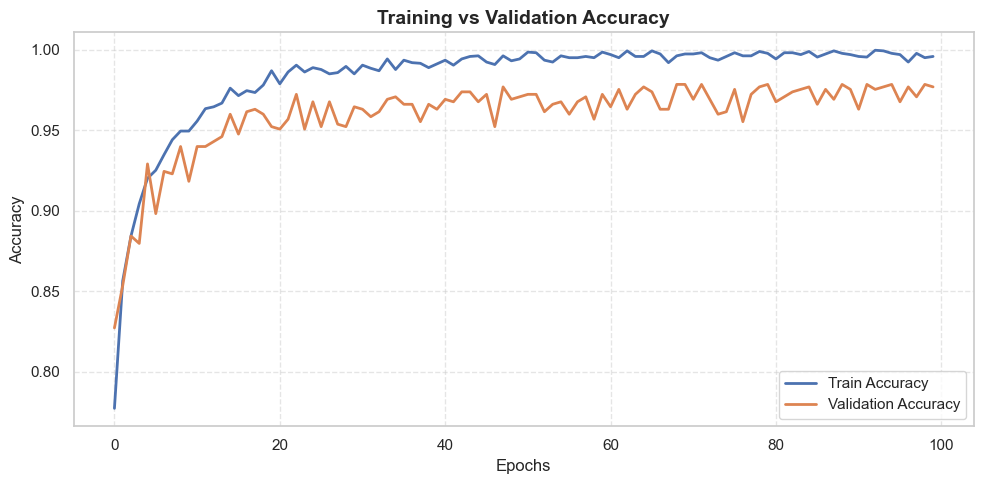

In [118]:
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label="Train Accuracy", linewidth=2)
plt.plot(val_accs, label="Validation Accuracy", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


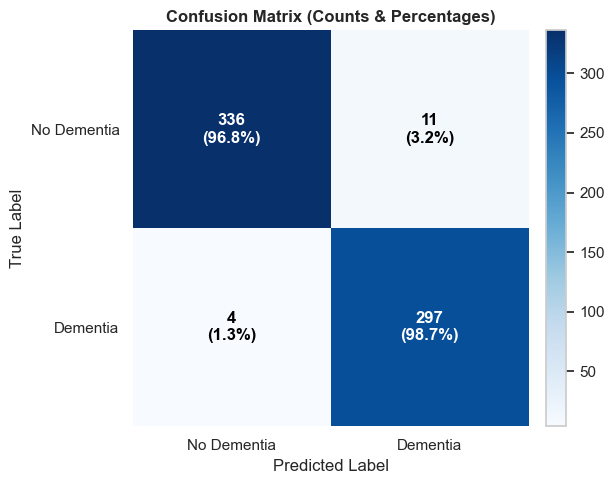

In [119]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        preds = (outputs > 0.5).int()

        y_pred.extend(preds.cpu().numpy().flatten())
        y_true.extend(labels.cpu().numpy().flatten())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert to percentages
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")
plt.colorbar(fraction=0.046, pad=0.04)

plt.xticks([0, 1], ["No Dementia", "Dementia"])
plt.yticks([0, 1], ["No Dementia", "Dementia"])

# Remove grid and spines (THIS removes the boxes)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Annotate
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i,
            f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)",
            ha="center",
            va="center",
            fontsize=12,
            fontweight="bold",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Counts & Percentages)", fontweight="bold")
plt.tight_layout()
plt.show()


In [120]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, cohen_kappa_score
)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)

print("📊 Evaluation Metrics")
print(f"Accuracy        : {accuracy:.4f}")
print(f"Precision       : {precision:.4f}")
print(f"Recall          : {recall:.4f}")
print(f"F1 Score        : {f1:.4f}")
print(f"Cohen’s Kappa   : {kappa:.4f}")


📊 Evaluation Metrics
Accuracy        : 0.9769
Precision       : 0.9643
Recall          : 0.9867
F1 Score        : 0.9754
Cohen’s Kappa   : 0.9535
